In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Basic EDA on Coco Gauff

In [2]:
summary = pd.read_csv('CocoG.csv')

summary

,Year,M,W,L,Win,Set W-L,Set,Game W-L,Game,TB W-L,...,A,DF,1stIn,1st,2nd,SPW,RPW,TPW,DR,Best
0,2024,66,50,16,75.8,106-44,70.7,808-539,60.0,8-7,...,5.2,9.2,57.5,72.2,44.1,60.3,48.6,54.4,1.22,W (2x)
1,2023,67,51,16,76.1,107-43,71.3,776-563,58.0,8-1,...,6.0,5.1,60.7,68.1,47.6,60.1,45.7,52.9,1.14,W (4x)
2,2022,61,38,23,62.3,80-51,61.1,672-572,54.0,10-7,...,6.0,7.5,63.0,65.9,45.8,58.5,44.7,51.5,1.08,F (Roland Garros)
3,2021,50,34,16,68.0,69-46,60.0,590-514,53.4,10-7,...,6.8,7.2,60.4,67.7,46.2,59.2,43.4,51.3,1.06,W (Parma)
4,2020,18,10,8,55.6,26-19,57.8,229-217,51.3,3-2,...,4.0,10.6,61.0,68.8,41.3,58.1,41.9,50.2,1.00,SF (Lexington)
5,2019,16,11,5,68.8,21-16,56.8,172-176,49.4,3-0,...,3.9,6.8,65.2,64.7,42.8,57.1,42.8,49.9,1.00,W (Linz)


In [3]:
summary.columns

Index(['Year', 'M', 'W', 'L', 'Win', 'Set W-L', 'Set', 'Game W-L', 'Game',
       'TB W-L', 'TB', 'MS', 'Hld', 'Brk', 'A', 'DF', '1stIn', '1st', '2nd',
       'SPW', 'RPW', 'TPW', 'DR', 'Best'],
      dtype='object')

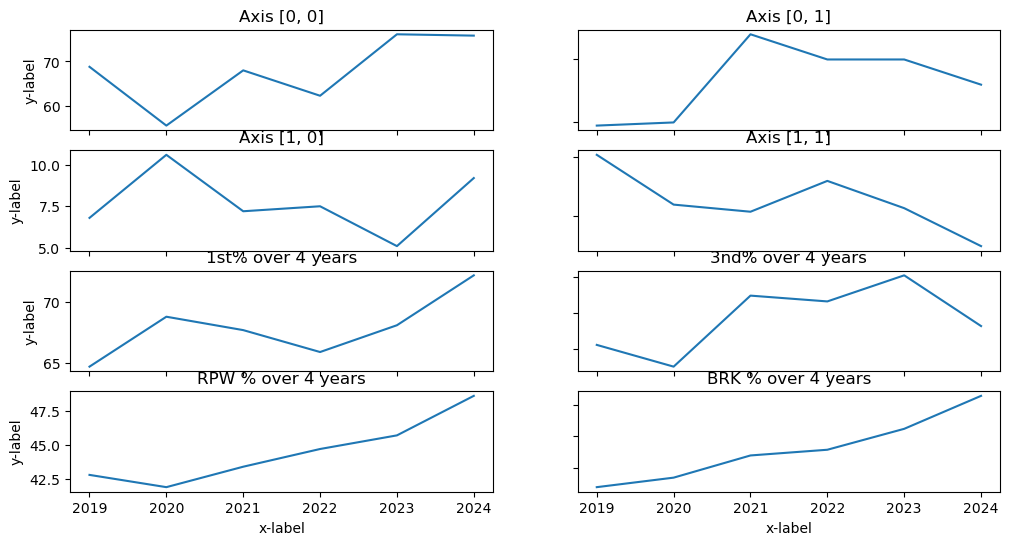

In [4]:
fig, axs = plt.subplots(4, 2, figsize=(12, 6))
axs[0, 0].plot(summary['Year'], summary['Win'])
axs[0, 0].set_title('Axis [0, 0]')
axs[0, 1].plot(summary['Year'], summary['A'])
axs[0, 1].set_title('Axis [0, 1]')
axs[1, 0].plot(summary['Year'], summary['DF'])
axs[1, 0].set_title('Axis [1, 0]')
axs[1, 1].plot(summary['Year'], summary['1stIn'])
axs[1, 1].set_title('Axis [1, 1]')

axs[2, 0].plot(summary['Year'], summary['1st'])
axs[2, 0].set_title('1st% over 4 years')

axs[2, 1].plot(summary['Year'], summary['2nd'])
axs[2, 1].set_title('3nd% over 4 years')

axs[3, 0].plot(summary['Year'], summary['RPW'])
axs[3, 0].set_title('RPW % over 4 years')

axs[3, 1].plot(summary['Year'], summary['Brk'])
axs[3, 1].set_title('BRK % over 4 years')

                                        
                                    
for ax in axs.flat:
    ax.set(xlabel='x-label', ylabel='y-label')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

## More detailed Data

In [7]:
y2019 = pd.read_csv('wta_matches_2019.csv')
y2020 = pd.read_csv('wta_matches_2020.csv')
y2021 = pd.read_csv('wta_matches_2021.csv')
y2022 = pd.read_csv('wta_matches_2022.csv')
y2023 = pd.read_csv('wta_matches_2023.csv')
y2024 = pd.read_csv('wta_matches_2024.csv')

In [182]:
Cgwin2019 = y2019[y2019['winner_name'] == 'Coco Gauff']
Cglose2019 = y2019[y2019['loser_name'] == 'Coco Gauff']

Cgwin2020 = y2020[y2020['winner_name'] == 'Coco Gauff']
Cglose2020 = y2020[y2020['loser_name'] == 'Coco Gauff']

Cgwin2021 = y2021[y2021['winner_name'] == 'Coco Gauff']
Cglose2021 = y2021[y2021['loser_name'] == 'Coco Gauff']

Cgwin2022 = y2022[y2022['winner_name'] == 'Coco Gauff']
Cglose2022 = y2022[y2022['loser_name'] == 'Coco Gauff']

Cgwin2023 = y2023[y2023['winner_name'] == 'Coco Gauff']
Cglose2023 = y2023[y2023['loser_name'] == 'Coco Gauff']

Cgwin2024 = y2024[y2024['winner_name'] == 'Coco Gauff']
Cglose2024 = y2024[y2024['loser_name'] == 'Coco Gauff']

In [183]:
Cgyears = pd.concat([Cgwin2019, Cglose2019,Cgwin2020, Cglose2020, Cgwin2021, Cglose2021, Cgwin2022, 
                   Cglose2022, Cgwin2023, Cglose2023, Cgwin2024, Cglose2024], axis=0)

Cgyears['Year'] = Cgyears['tourney_date'].astype(str).str[:4]

Cgyears['Win'] = Cgyears['winner_name'].apply(lambda x: 0 if x != 'Coco Gauff' else 1)
Cgyears['Lose'] = Cgyears['loser_name'].apply(lambda x: 0 if x != 'Coco Gauff' else 1)
Cgyears['Outcome'] = Cgyears['loser_name'].apply(lambda x: 'Lose' if x != 'Coco Gauff' else 'Win')

# Calculate Win Percentage
Cgyears['Win_Percentage'] = Cgyears['Win'] / (Cgyears['Win'] + Cgyears['Lose'])

## Comparing against Top player

In [121]:
aswin2019 = y2019[y2019['winner_name'] == 'Aryna Sabalenka']
aslose2019 = y2019[y2019['loser_name'] == 'Aryna Sabalenka']

aswin2020 = y2020[y2020['winner_name'] == 'Aryna Sabalenka']
aslose2020 = y2020[y2020['loser_name'] == 'Aryna Sabalenka']

aswin2021 = y2021[y2021['winner_name'] == 'Aryna Sabalenka']
aslose2021 = y2021[y2021['loser_name'] == 'Aryna Sabalenka']

aswin2022 = y2022[y2022['winner_name'] == 'Aryna Sabalenka']
aslose2022 = y2022[y2022['loser_name'] == 'Aryna Sabalenka']

aswin2023 = y2023[y2023['winner_name'] == 'Aryna Sabalenka']
aslose2023 = y2023[y2023['loser_name'] == 'Aryna Sabalenka']

aswin2024 = y2024[y2024['winner_name'] == 'Aryna Sabalenka']
aslose2024 = y2024[y2024['loser_name'] == 'Aryna Sabalenka']

In [177]:
Asyears = pd.concat([aswin2019, aslose2019,aswin2020, aslose2020,aswin2021, aslose2021, aswin2022, 
                   aslose2022, aswin2023, aslose2023, aswin2024, aslose2024], axis=0)

Asyears['Year'] = Asyears['tourney_date'].astype(str).str[:4]

Asyears['Win'] = Asyears['winner_name'].apply(lambda x: 0 if x != 'Aryna Sabalenka' else 1)
Asyears['Lose'] = Asyears['loser_name'].apply(lambda x: 0 if x != 'Aryna Sabalenka' else 1)


Asyears['Win_Percentage'] = Asyears['Win'] / (Asyears['Win'] + Asyears['Lose'])

Asyears = Asyears[Asyears['Year'] > '2018']

## Comparison against similar standing Player #2 player

In [133]:
qzwin2019 = y2019[y2019['winner_name'] == 'Qinwen Zheng']
qzlose2019 = y2019[y2019['loser_name'] == 'Qinwen Zheng']

qzwin2020 = y2020[y2020['winner_name'] == 'Qinwen Zheng']
qzlose2020 = y2020[y2020['loser_name'] == 'Qinwen Zheng']

qzwin2021 = y2021[y2021['winner_name'] == 'Qinwen Zheng']
qzlose2021 = y2021[y2021['loser_name'] == 'Qinwen Zheng']

qzwin2022 = y2022[y2022['winner_name'] == 'Qinwen Zheng']
qzlose2022 = y2022[y2022['loser_name'] == 'Qinwen Zheng']

qzwin2023 = y2023[y2023['winner_name'] == 'Qinwen Zheng']
qzlose2023 = y2023[y2023['loser_name'] == 'Qinwen Zheng']

qzwin2024 = y2024[y2024['winner_name'] == 'Qinwen Zheng']
qzlose2024 = y2024[y2024['loser_name'] == 'Qinwen Zheng']

In [134]:
qzyears = pd.concat([qzwin2019, qzlose2019,qzwin2020, qzlose2020,qzwin2021, qzlose2021, qzwin2022, 
                   qzlose2022, qzwin2023, qzlose2023, qzwin2024, qzlose2024], axis=0)

qzyears['Year'] = qzyears['tourney_date'].astype(str).str[:4]

qzyears['Win'] = qzyears['winner_name'].apply(lambda x: 0 if x != 'Qinwen Zheng' else 1)
qzyears['Lose'] = qzyears['loser_name'].apply(lambda x: 0 if x != 'Qinwen Zheng' else 1)


qzyears['Win_Percentage'] = qzyears['Win'] / (qzyears['Win'] + qzyears['Lose'])

## Against Surface Overall Win Percentage

In [184]:
# Group by Year and Surface, and calculate average win percentage

Cgperformance_summary = Cgyears.groupby(['Year', 'surface']).agg({'Win_Percentage': 'mean'}).reset_index()

Asperformance_summary = Asyears.groupby(['Year', 'surface']).agg({'Win_Percentage': 'mean'}).reset_index()

qzperformance_summary = qzyears.groupby(['Year', 'surface']).agg({'Win_Percentage': 'mean'}).reset_index()


In [185]:
Cgperformance_summary['Player'] = 'Coco Gauff'
Asperformance_summary['Player'] = 'Aryna Sabalenka'
qzperformance_summary['Player'] = 'Qinwen Zheng'

In [186]:
combined_summary = pd.concat([Cgperformance_summary, Asperformance_summary, qzperformance_summary])


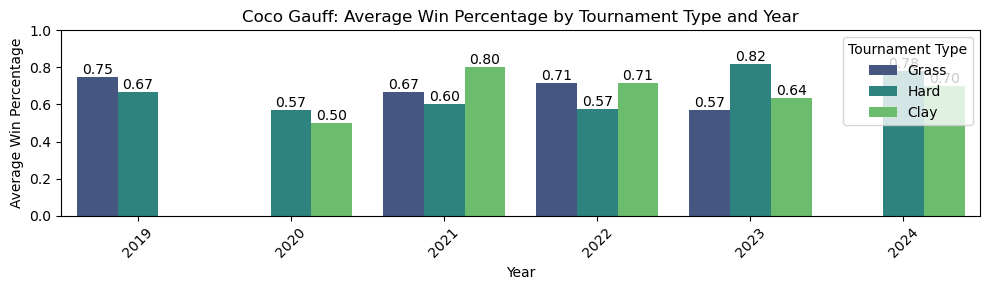

In [162]:
# Calculate average Win_Percentage by Year and Type
Cgaverage_win_percentage = Cgperformance_summary.groupby(['Year', 'surface'])['Win_Percentage'].mean().reset_index()

# Plotting
plt.figure(figsize=(10, 3))
sns.barplot(data=Cgaverage_win_percentage, x='Year', y='Win_Percentage', hue='surface', palette='viridis')

# Customize the plot
plt.title('Coco Gauff: Average Win Percentage by Tournament Type and Year')
plt.xlabel('Year')
plt.ylabel('Average Win Percentage')
plt.legend(title='Tournament Type')
plt.ylim(0, 1)  # Set y-axis limits from 0 to 1
plt.xticks(rotation=45)
plt.tight_layout()

# Adding data labels
for p in plt.gca().patches:
    plt.annotate(f'{p.get_height():.2f}', 
                 (p.get_x() + p.get_width() / 2., p.get_height()), 
                 ha='center', va='bottom')

plt.tight_layout()

# Show the plot
plt.show()

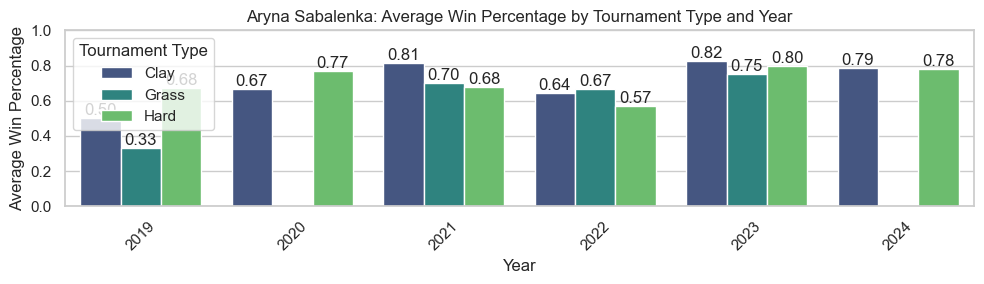

In [191]:
# Calculate average Win_Percentage by Year and Type
Asaverage_win_percentage = Asperformance_summary.groupby(['Year', 'surface'])['Win_Percentage'].mean().reset_index()

# Plotting
plt.figure(figsize=(10, 3))
sns.barplot(data=Asaverage_win_percentage, x='Year', y='Win_Percentage', hue='surface', palette='viridis')

# Customize the plot
plt.title('Aryna Sabalenka: Average Win Percentage by Tournament Type and Year')
plt.xlabel('Year')
plt.ylabel('Average Win Percentage')
plt.legend(title='Tournament Type')
plt.ylim(0, 1)  # Set y-axis limits from 0 to 1
plt.xticks(rotation=45)
plt.tight_layout()

# Adding data labels
for p in plt.gca().patches:
    plt.annotate(f'{p.get_height():.2f}', 
                 (p.get_x() + p.get_width() / 2., p.get_height()), 
                 ha='center', va='bottom')

plt.tight_layout()

# Show the plot
plt.show()

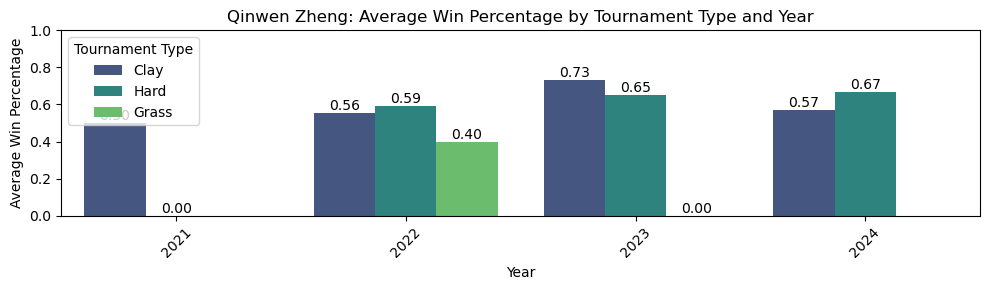

In [160]:
# Calculate average Win_Percentage by Year and Type
qzaverage_win_percentage = qzperformance_summary.groupby(['Year', 'surface'])['Win_Percentage'].mean().reset_index()

# Plotting
plt.figure(figsize=(10, 3))
sns.barplot(data=qzaverage_win_percentage, x='Year', y='Win_Percentage', hue='surface', palette='viridis')

# Customize the plot
plt.title('Qinwen Zheng: Average Win Percentage by Tournament Type and Year')
plt.xlabel('Year')
plt.ylabel('Average Win Percentage')
plt.legend(title='Tournament Type')
plt.ylim(0, 1)  # Set y-axis limits from 0 to 1
plt.xticks(rotation=45)
plt.tight_layout()

# Adding data labels
for p in plt.gca().patches:
    plt.annotate(f'{p.get_height():.2f}', 
                 (p.get_x() + p.get_width() / 2., p.get_height()), 
                 ha='center', va='bottom')

plt.tight_layout()

# Show the plot
plt.show()

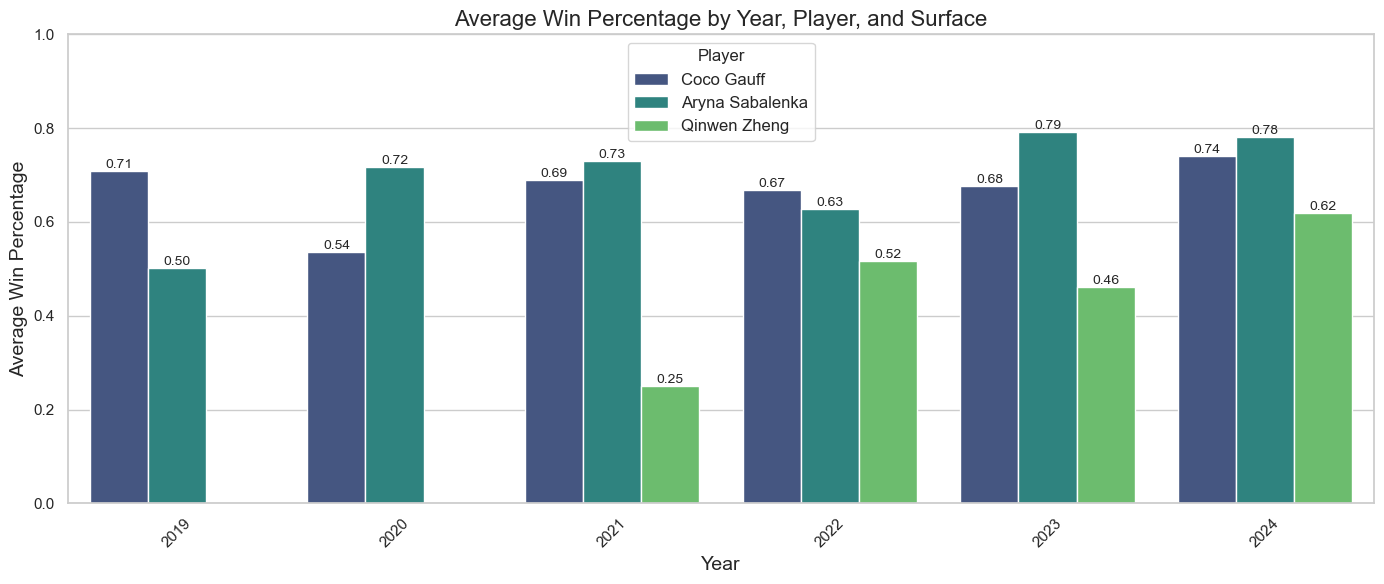

In [196]:
# Set the style for the plot
sns.set(style="whitegrid")

# Plotting
plt.figure(figsize=(14, 6))
sns.barplot(data=combined_summary, x='Year', y='Win_Percentage', hue='Player', palette='viridis', errorbar=None)

# Customize the plot
plt.title('Average Win Percentage by Year, Player, and Surface', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Average Win Percentage', fontsize=14)
plt.legend(title='Player', fontsize=12)
plt.ylim(0, 1)  # Set y-axis limits from 0 to 1
plt.xticks(rotation=45)
plt.tight_layout()

# Adding data labels on top of the bars
for p in plt.gca().patches:
    plt.annotate(f'{p.get_height():.2f}', 
                 (p.get_x() + p.get_width() / 2., p.get_height()), 
                 ha='center', va='bottom', fontsize=10)

# Show the plot
plt.show()

## Against Surface Serve %

In [139]:
## look into w_1stIn	w_1stWon	w_2ndWon

CGw = Cgyears[Cgyears['Win'] == 1]
CGl = Cgyears[Cgyears['Lose'] == 1]

# Group by Year and Surface, and calculate average win percentage

CGw_summary = CGw.groupby(['Year', 'surface']).agg({'w_1stIn': 'mean', 'w_1stWon': 'mean', 'w_2ndWon': 'mean', 'w_ace': 'mean', 'w_df': 'mean'}).reset_index()
CGw_summary.rename({'w_1stIn': '1stIn', 'w_1stWon': '1stWon', 'w_2ndWon': '2ndWon', 'w_ace': 'ace', 'w_df': 'df'}, axis=1, inplace=True)
CGl_summary = CGl.groupby(['Year', 'surface']).agg({'l_1stIn': 'mean', 'l_1stWon': 'mean', 'l_2ndWon': 'mean', 'l_ace': 'mean', 'l_df': 'mean'}).reset_index()
CGl_summary.rename({'l_1stIn': '1stIn', 'l_1stWon': '1stWon', 'l_2ndWon': '2ndWon', 'l_ace': 'ace', 'l_df': 'df'}, axis=1, inplace=True)

ASw = Asyears[Asyears['Win'] == 1]
ASl = Asyears[Asyears['Lose'] == 1]

# Group by Year and Surface, and calculate average win percentage
ASw_summary = ASw.groupby(['Year', 'surface']).agg({'w_1stIn': 'mean', 'w_1stWon': 'mean', 'w_2ndWon': 'mean', 'w_ace': 'mean', 'w_df': 'mean'}).reset_index()
ASw_summary.rename({'w_1stIn': '1stIn', 'w_1stWon': '1stWon', 'w_2ndWon': '2ndWon', 'w_ace': 'ace', 'w_df': 'df'}, axis=1, inplace=True)
ASl_summary = ASl.groupby(['Year', 'surface']).agg({'l_1stIn': 'mean', 'l_1stWon': 'mean', 'l_2ndWon': 'mean', 'l_ace': 'mean', 'l_df': 'mean'}).reset_index()
ASl_summary.rename({'l_1stIn': '1stIn', 'l_1stWon': '1stWon', 'l_2ndWon': '2ndWon', 'l_ace': 'ace', 'l_df': 'df'}, axis=1, inplace=True)

QZw = qzyears[qzyears['Win'] == 1]
QZl = qzyears[qzyears['Lose'] == 1]

# Group by Year and Surface, and calculate average win percentage
QZw_summary = QZw.groupby(['Year', 'surface']).agg({'w_1stIn': 'mean', 'w_1stWon': 'mean', 'w_2ndWon': 'mean', 'w_ace': 'mean', 'w_df': 'mean'}).reset_index()
QZw_summary.rename({'w_1stIn': '1stIn', 'w_1stWon': '1stWon', 'w_2ndWon': '2ndWon', 'w_ace': 'ace', 'w_df': 'df'}, axis=1, inplace=True)
QZl_summary = QZl.groupby(['Year', 'surface']).agg({'l_1stIn': 'mean', 'l_1stWon': 'mean', 'l_2ndWon': 'mean', 'l_ace': 'mean', 'l_df': 'mean'}).reset_index()
QZl_summary.rename({'l_1stIn': '1stIn', 'l_1stWon': '1stWon', 'l_2ndWon': '2ndWon', 'l_ace': 'ace', 'l_df': 'df'}, axis=1, inplace=True)

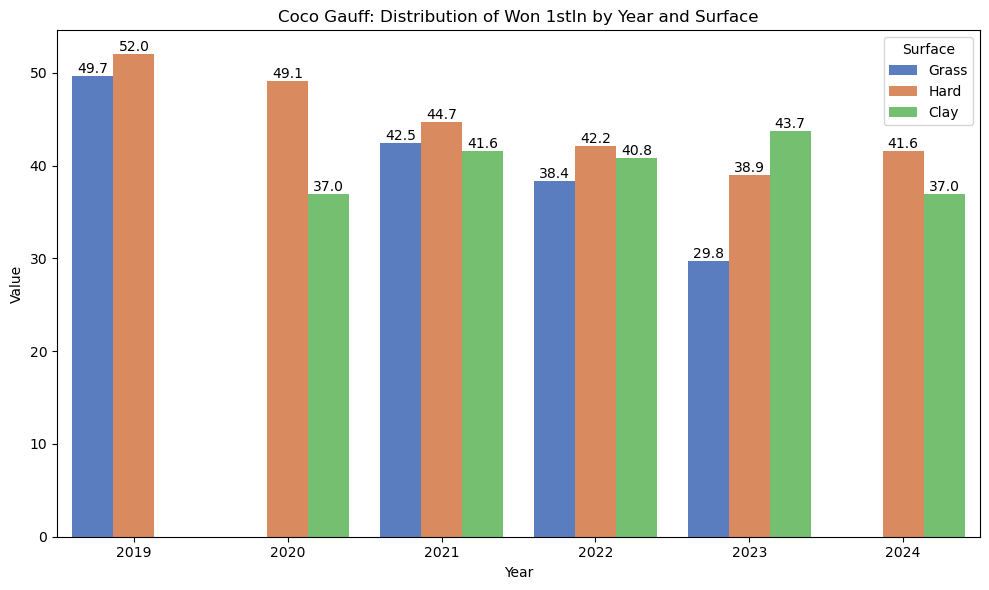

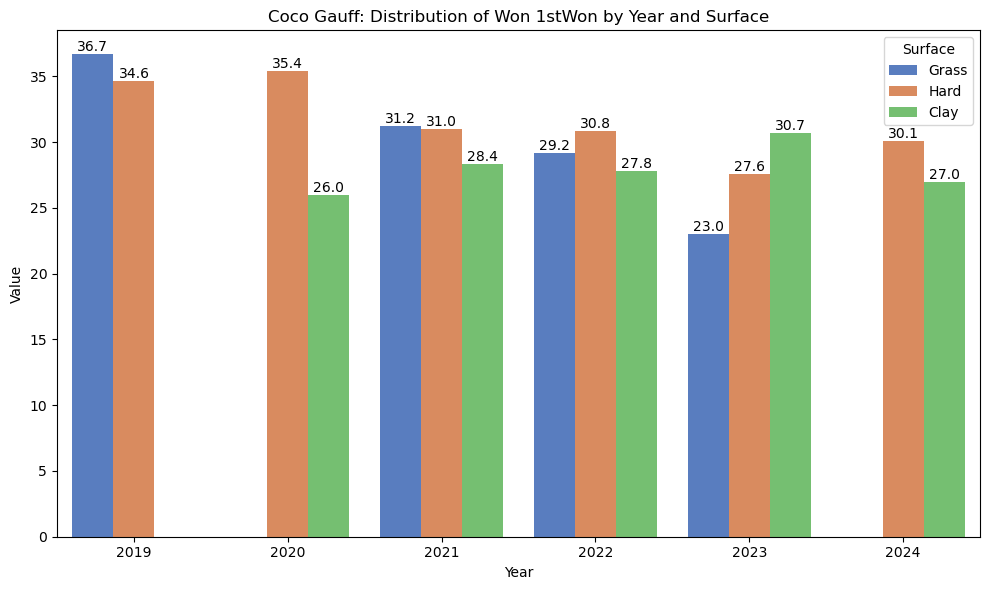

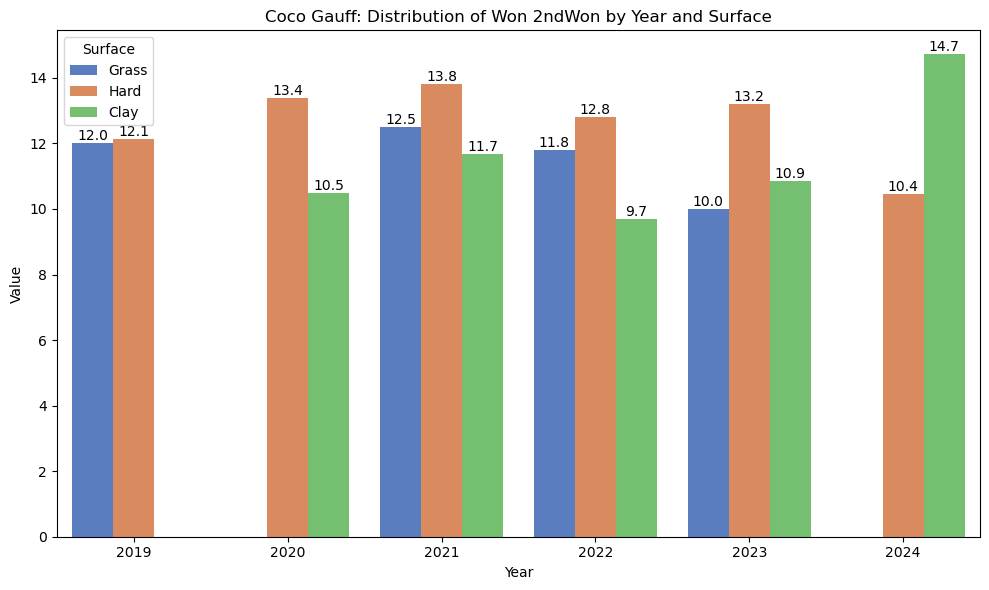

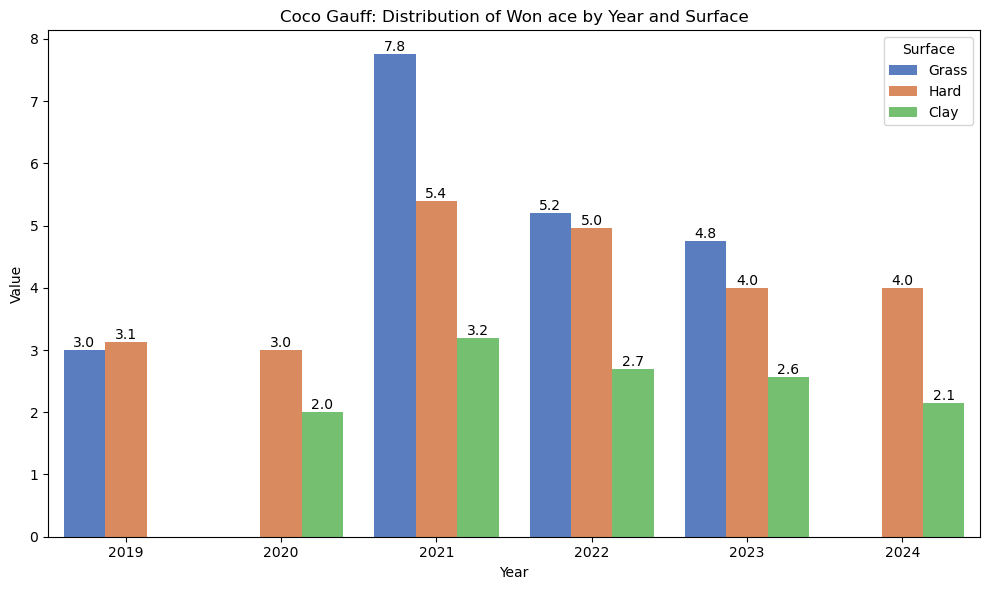

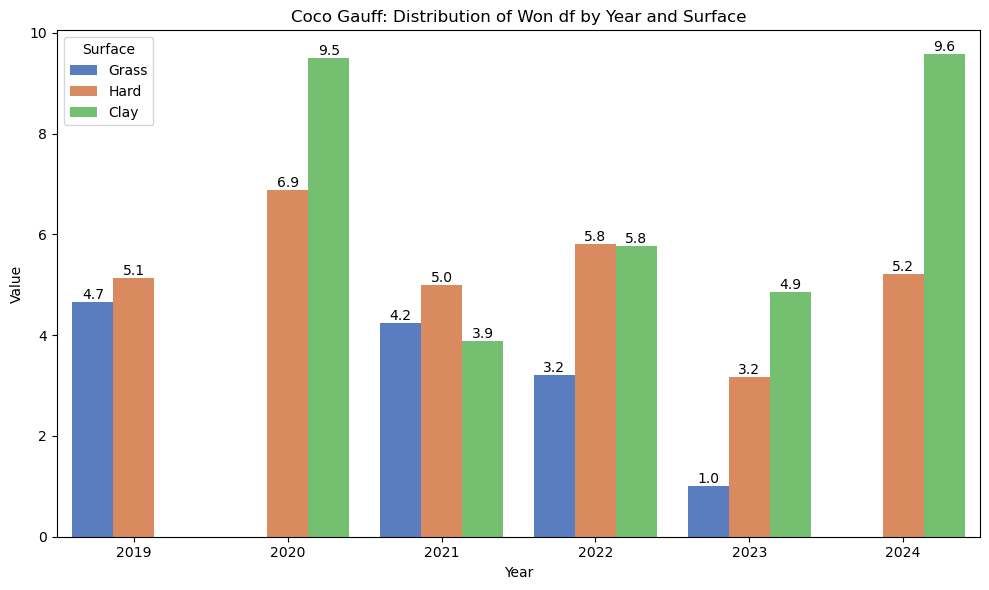

In [140]:
# Melting the DataFrame for easier plotting
CGw_melted = CGw_summary.melt(id_vars=['Year', 'surface'], value_vars=['1stIn', '1stWon', '2ndWon', 'ace', 'df'],
                    var_name='Metric', value_name='Value')

metrics = ['1stIn', '1stWon', '2ndWon', 'ace', 'df']

for metric in metrics:
    plt.figure(figsize=(10, 6))
    ax = sns.barplot(data=CGw_melted[CGw_melted['Metric'] == metric], x='Year', y='Value', hue='surface', errorbar=None, palette='muted')
    ax.set_title(f'Coco Gauff: Distribution of Won {metric} by Year and Surface')
    ax.set_xlabel('Year')
    ax.set_ylabel('Value')
    ax.legend(title='Surface')
    
    # Adding data labels
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.1f}', 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='bottom')

    plt.tight_layout()
    plt.show()

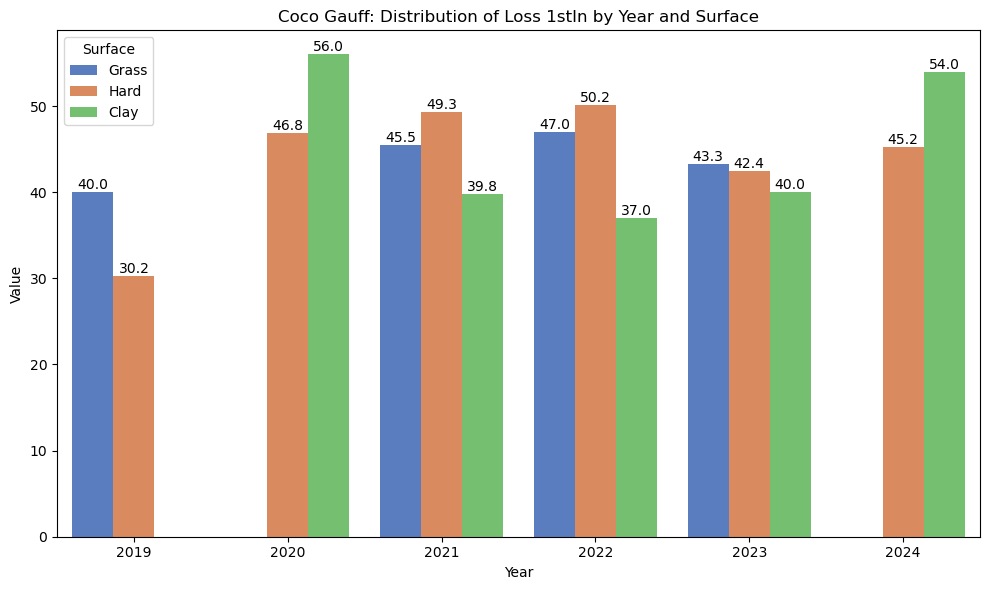

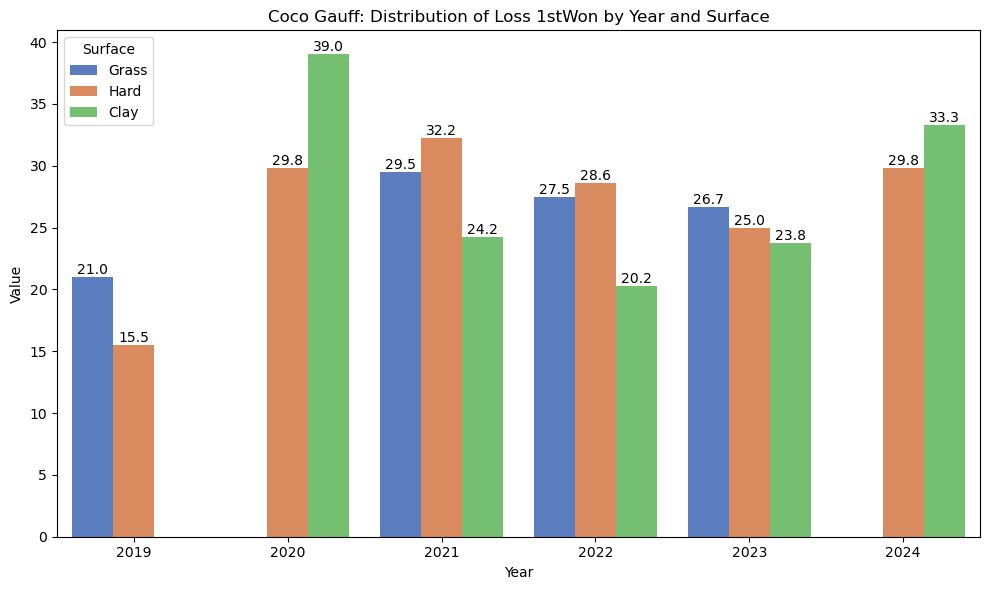

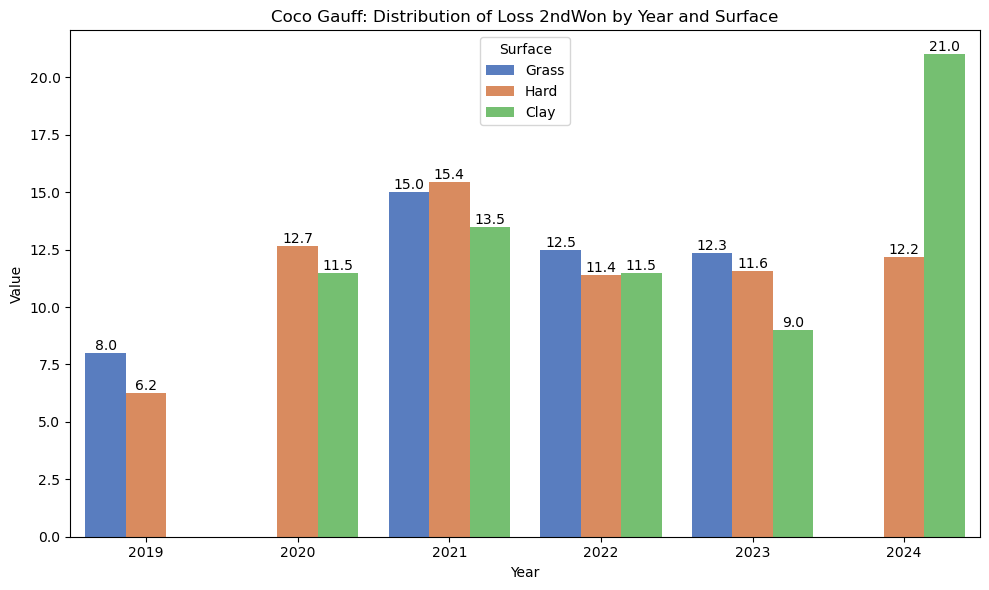

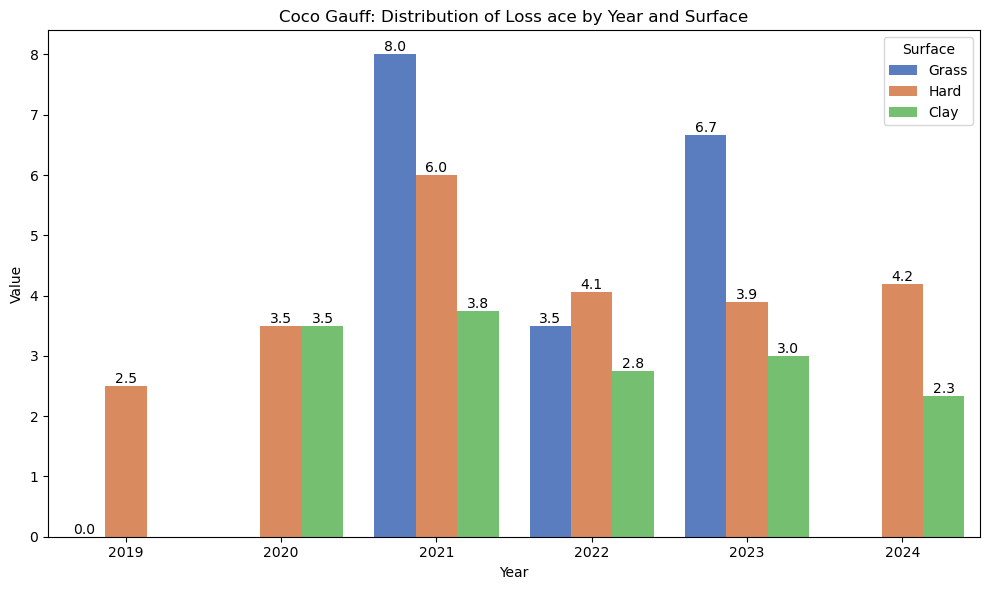

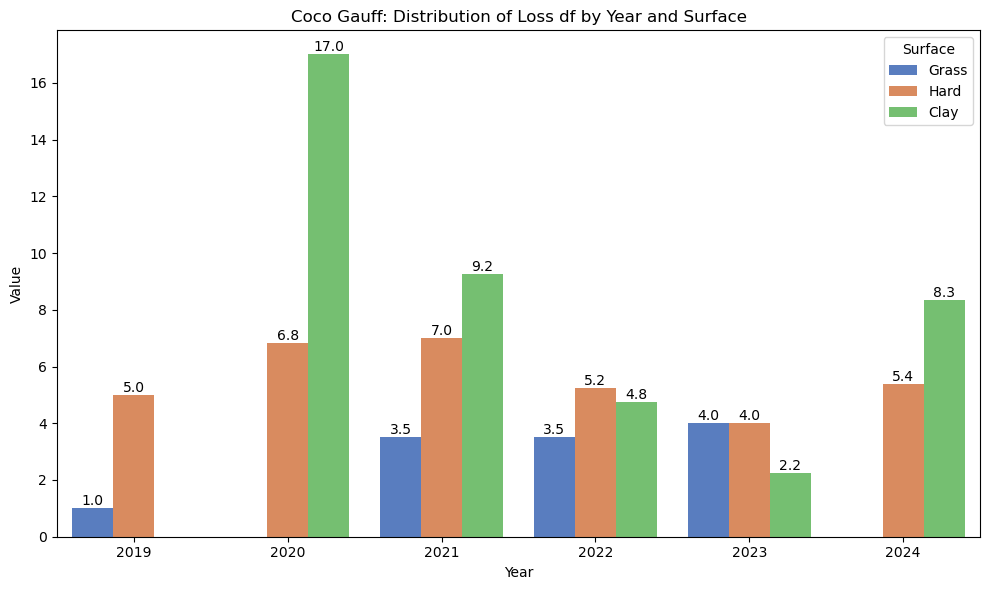

In [141]:
# Melting the DataFrame for easier plotting
CGl_melted = CGl_summary.melt(id_vars=['Year', 'surface'], value_vars=['1stIn', '1stWon', '2ndWon', 'ace', 'df'],
                    var_name='Metric', value_name='Value')

for metric in metrics:
    plt.figure(figsize=(10, 6))
    ax = sns.barplot(data=CGl_melted[CGl_melted['Metric'] == metric], x='Year', y='Value', hue='surface', errorbar=None, palette='muted')
    ax.set_title(f'Coco Gauff: Distribution of Loss {metric} by Year and Surface')
    ax.set_xlabel('Year')
    ax.set_ylabel('Value')
    ax.legend(title='Surface')
    
    # Adding data labels
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.1f}', 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='bottom')

    plt.tight_layout()
    plt.show()

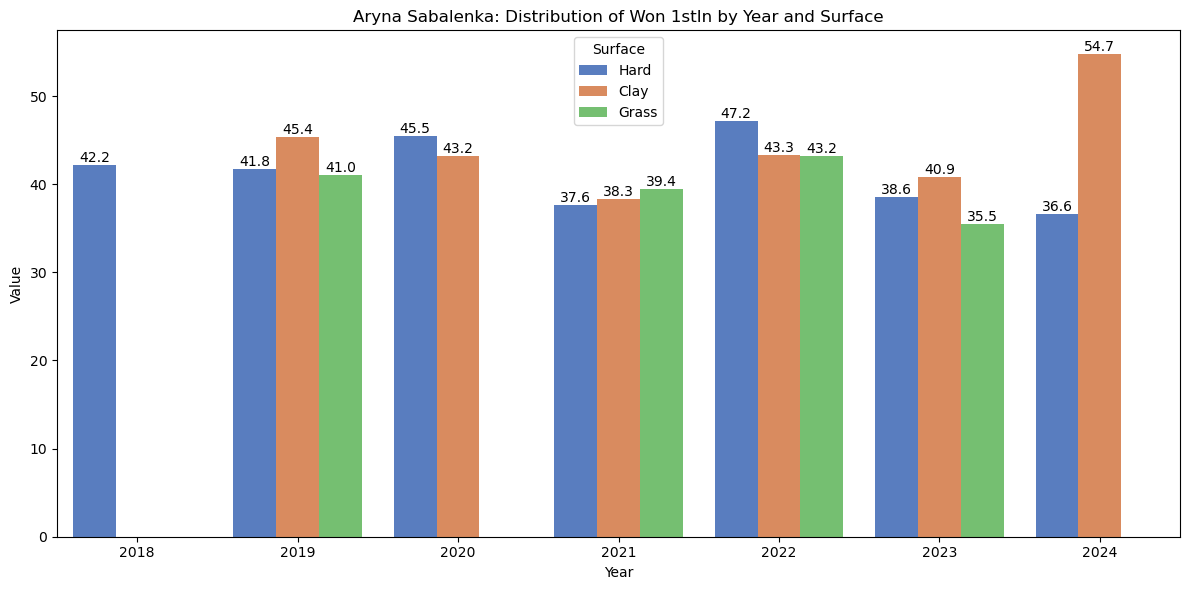

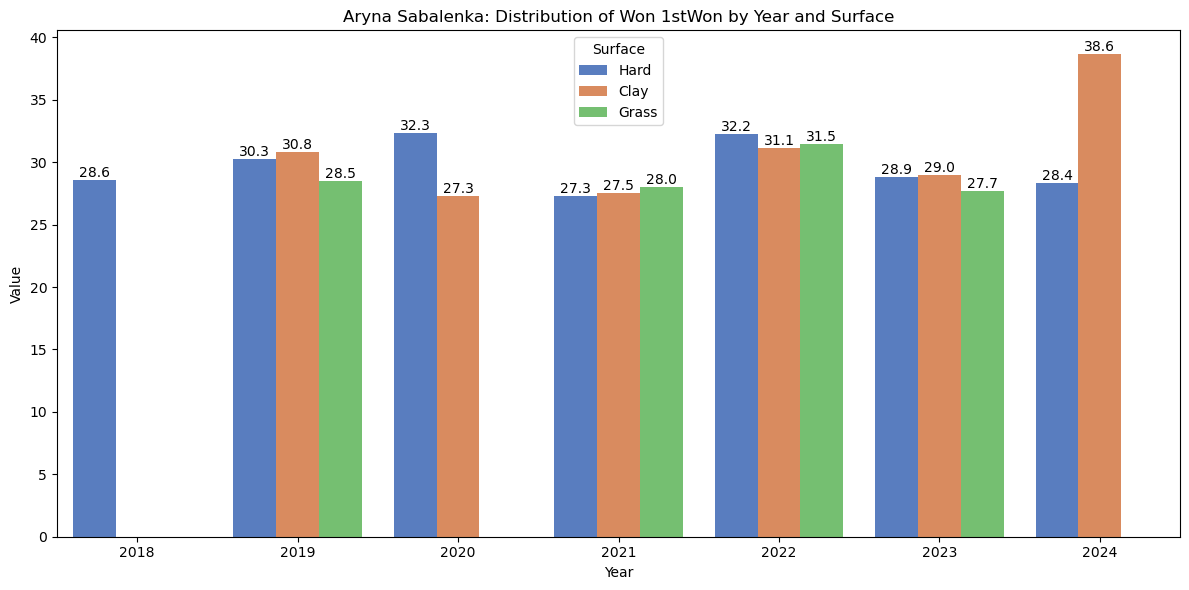

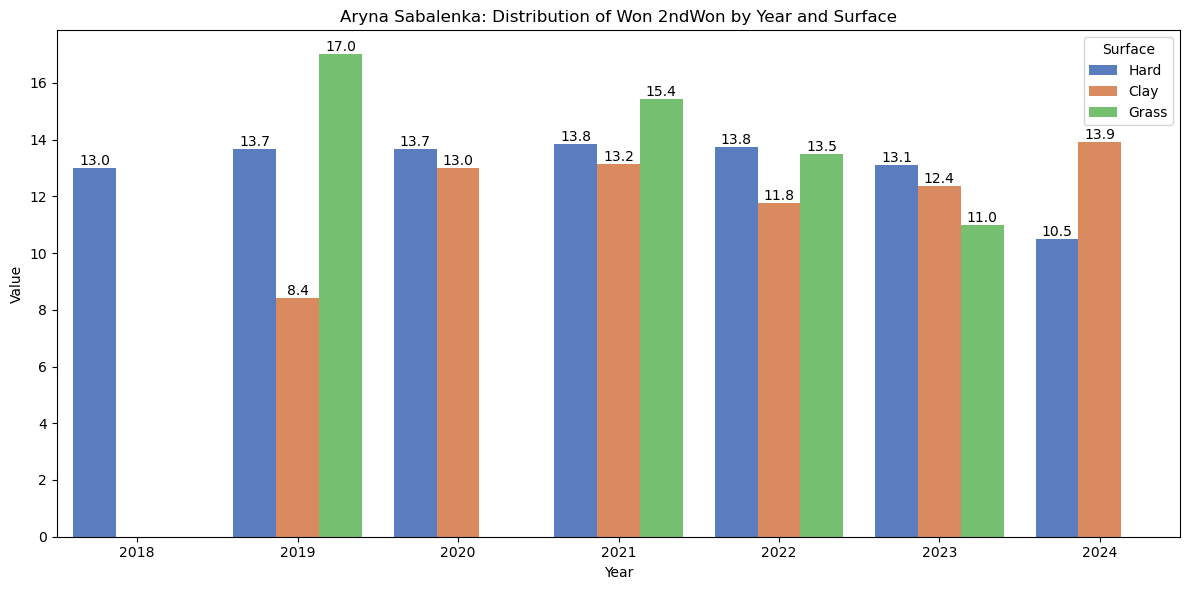

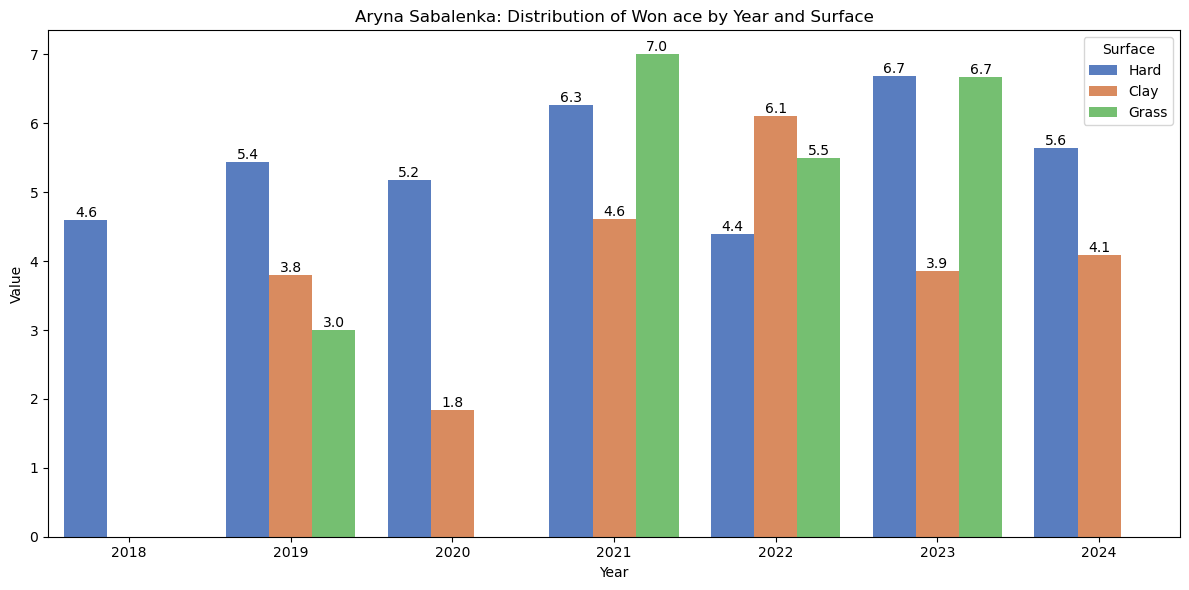

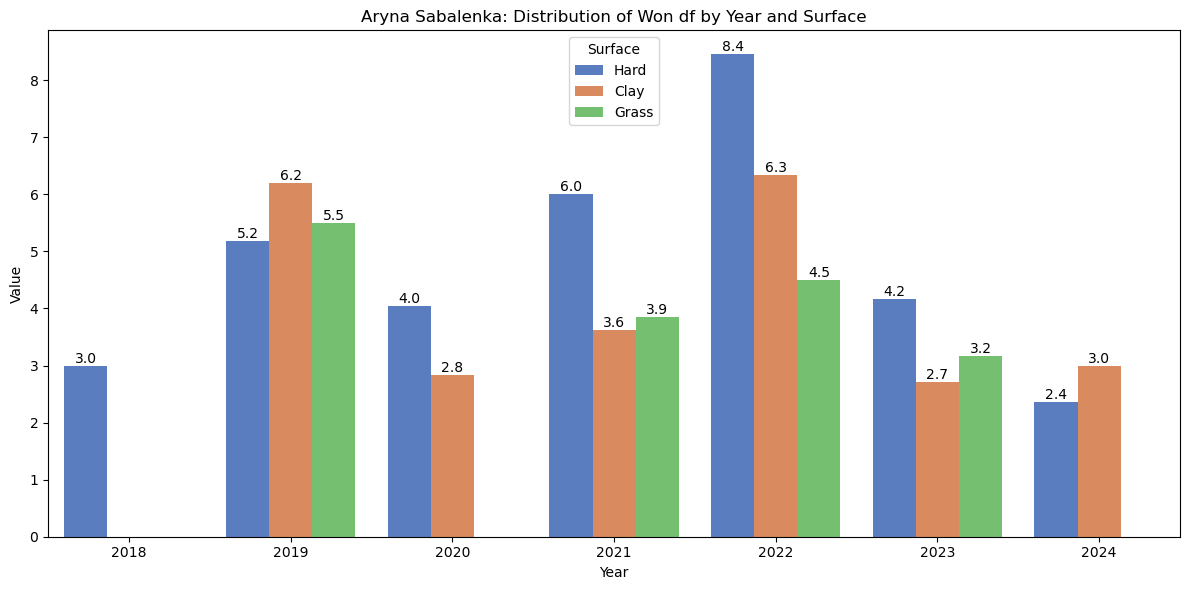

In [142]:
# Melting the DataFrame for easier plotting
ASw_melted = ASw_summary.melt(id_vars=['Year', 'surface'], value_vars=['1stIn', '1stWon', '2ndWon', 'ace', 'df'],
                    var_name='Metric', value_name='Value')

for metric in metrics:
    plt.figure(figsize=(12, 6))
    ax = sns.barplot(data=ASw_melted[ASw_melted['Metric'] == metric], x='Year', y='Value', hue='surface', errorbar=None, palette='muted')
    ax.set_title(f'Aryna Sabalenka: Distribution of Won {metric} by Year and Surface')
    ax.set_xlabel('Year')
    ax.set_ylabel('Value')
    ax.legend(title='Surface')
    
    # Adding data labels
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.1f}', 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='bottom')

    plt.tight_layout()
    plt.show()

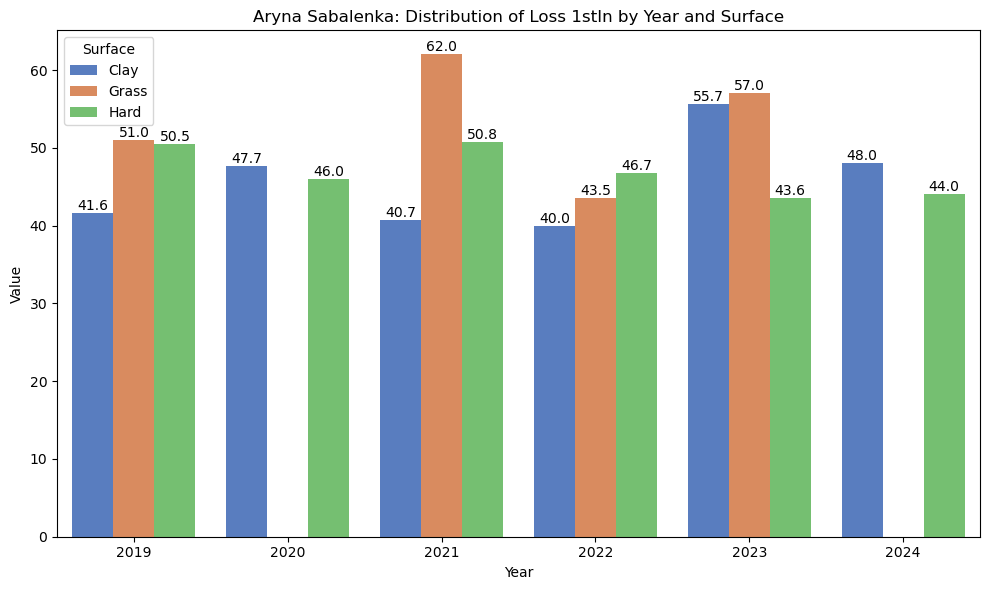

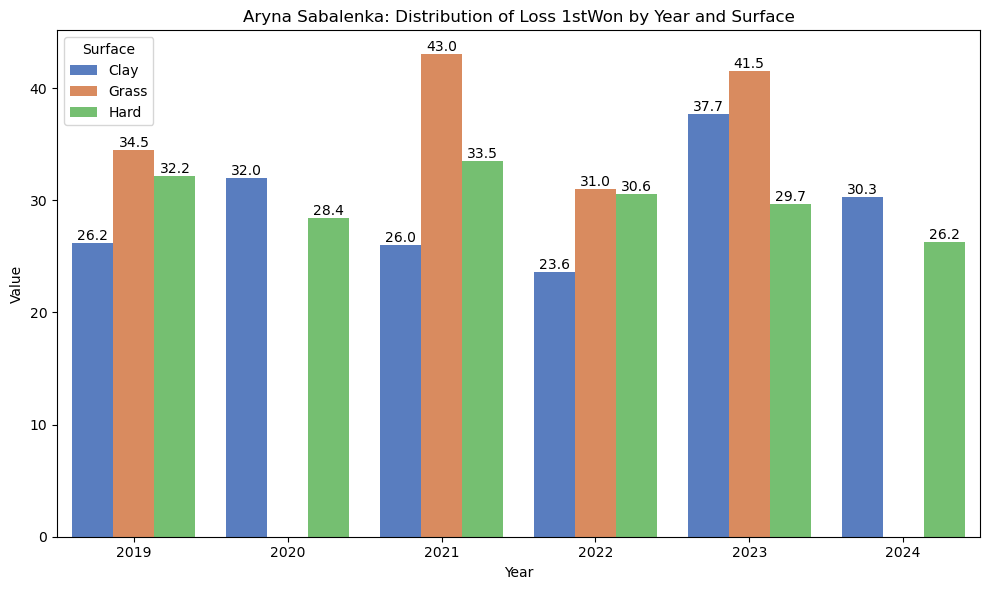

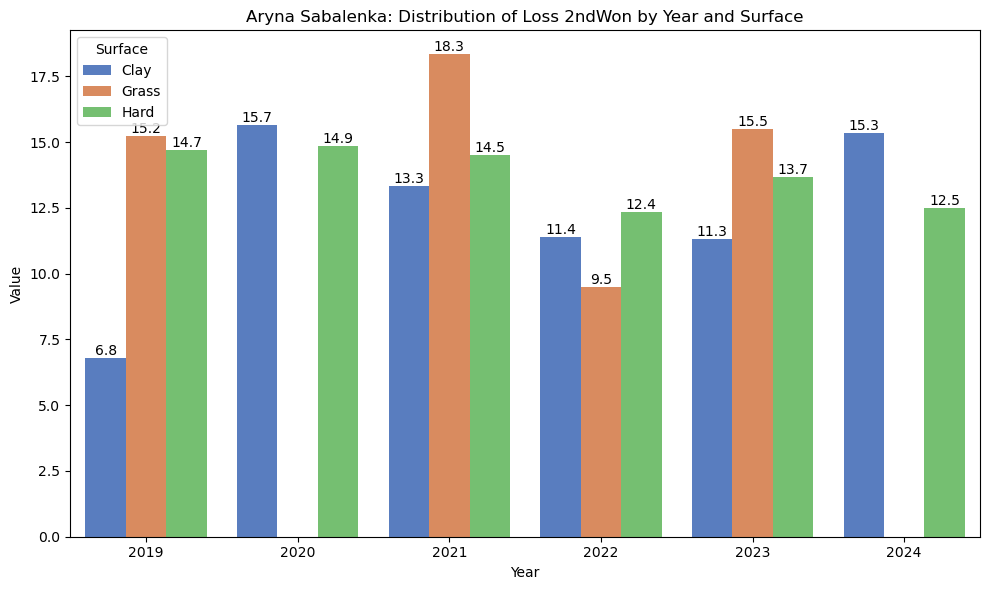

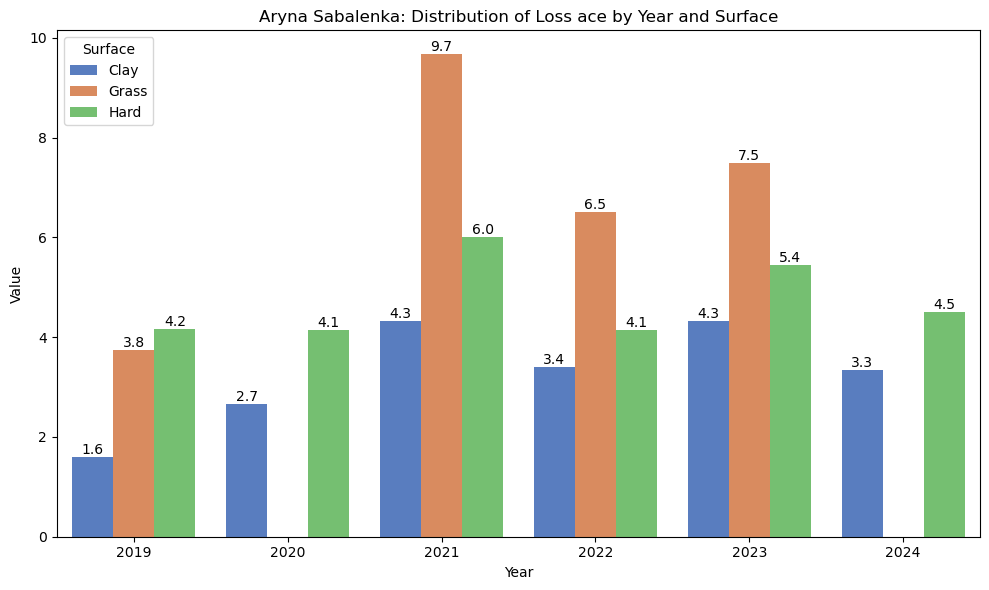

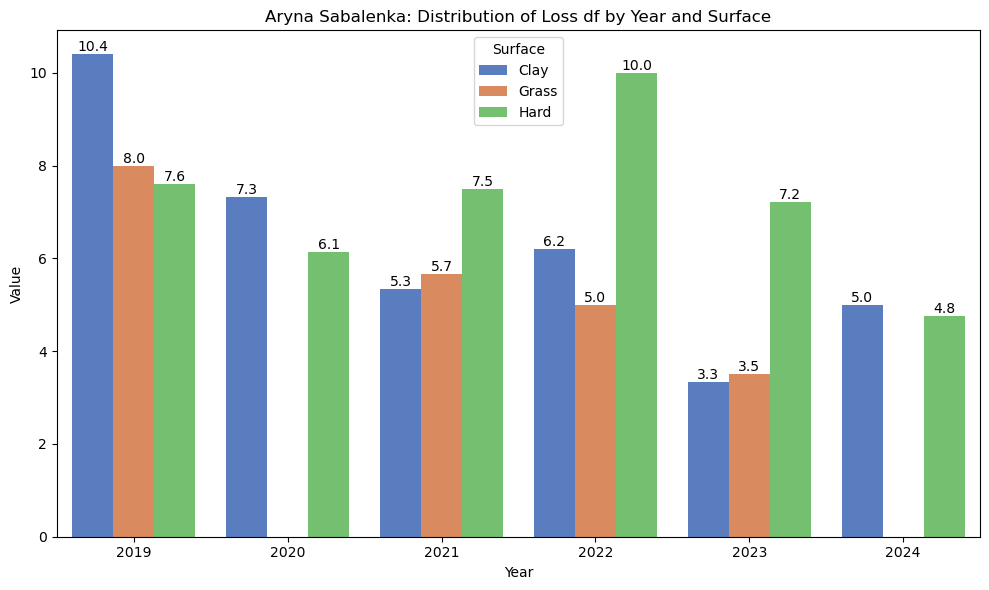

In [143]:
# Melting the DataFrame for easier plotting
ASl_melted = ASl_summary.melt(id_vars=['Year', 'surface'], value_vars=['1stIn', '1stWon', '2ndWon', 'ace', 'df'],
                    var_name='Metric', value_name='Value')

for metric in metrics:
    plt.figure(figsize=(10, 6))
    ax = sns.barplot(data=ASl_melted[ASl_melted['Metric'] == metric], x='Year', y='Value', hue='surface', errorbar=None, palette='muted')
    ax.set_title(f'Aryna Sabalenka: Distribution of Loss {metric} by Year and Surface')
    ax.set_xlabel('Year')
    ax.set_ylabel('Value')
    ax.legend(title='Surface')
    
    # Adding data labels
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.1f}', 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='bottom')

    plt.tight_layout()
    plt.show()

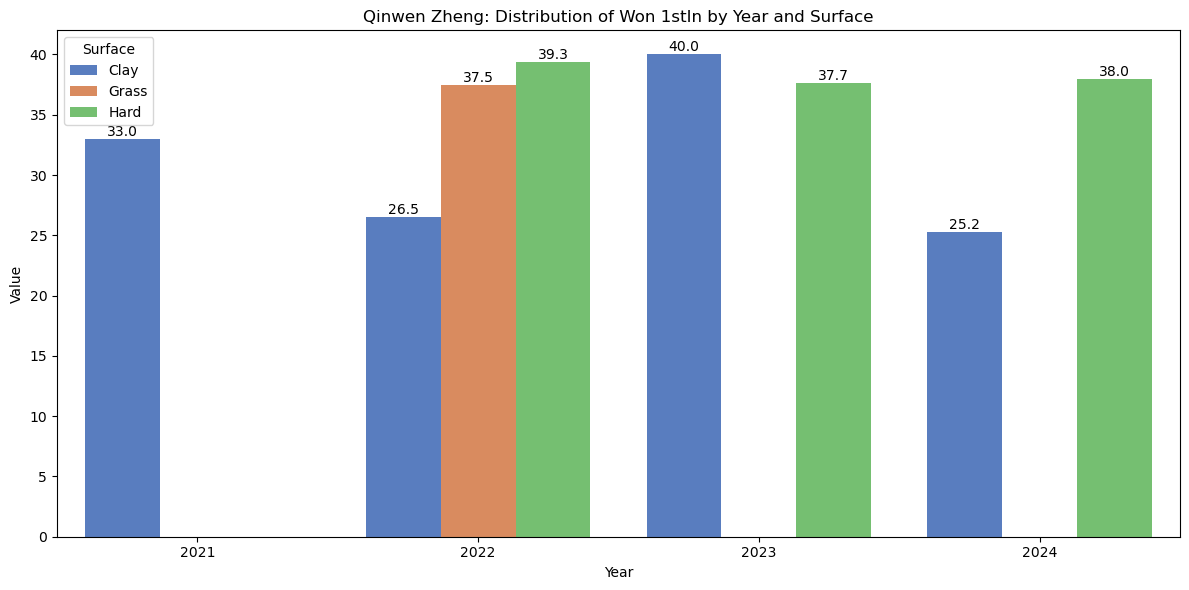

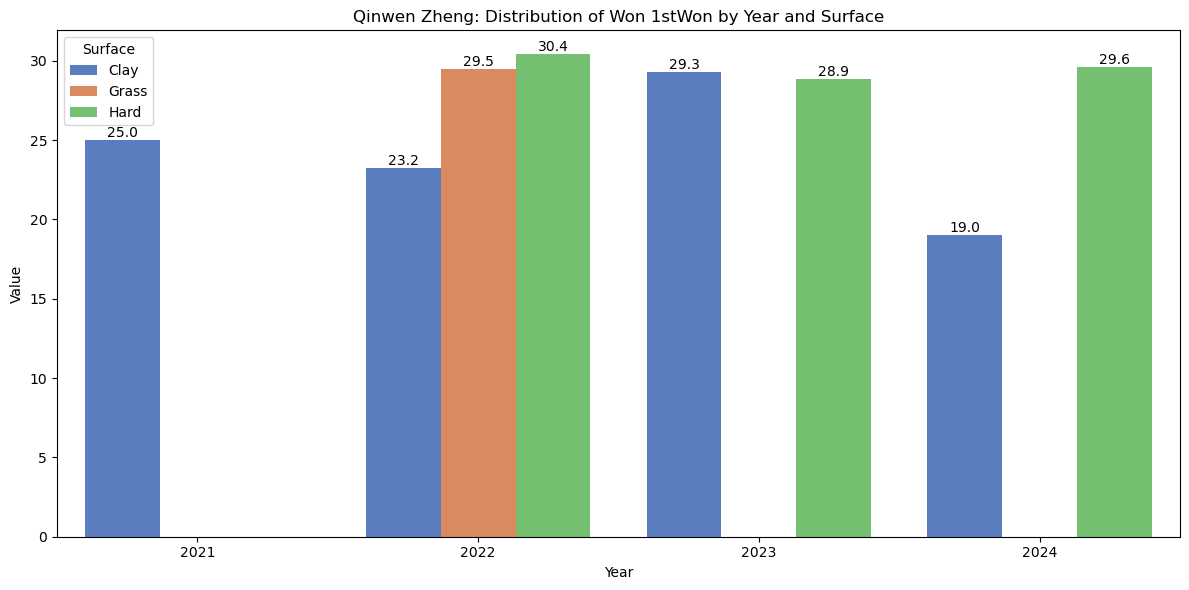

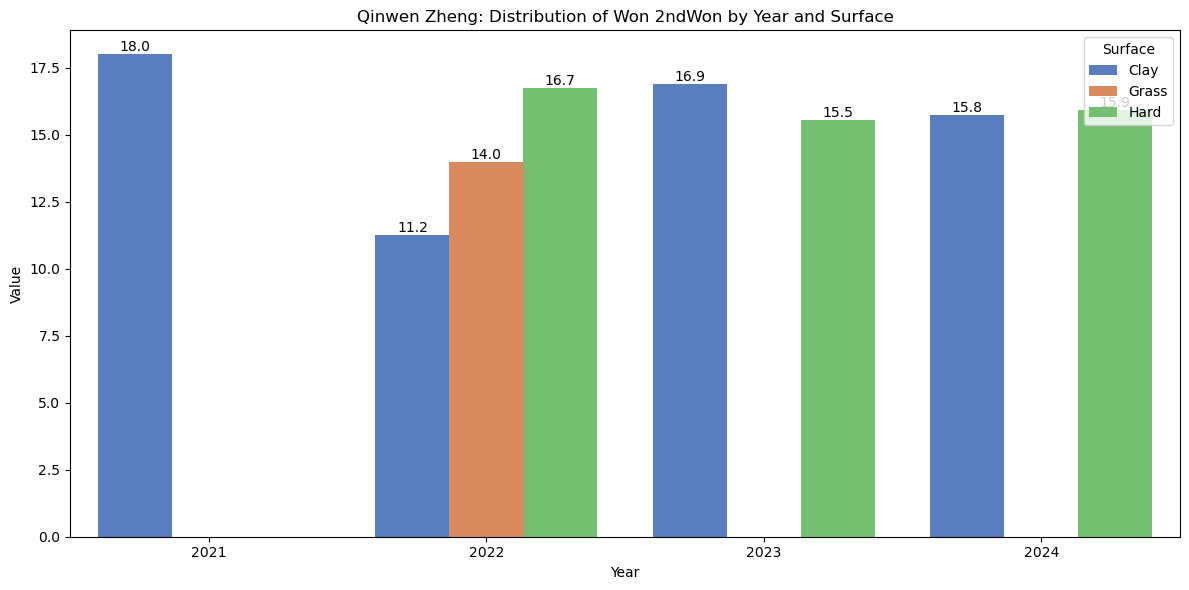

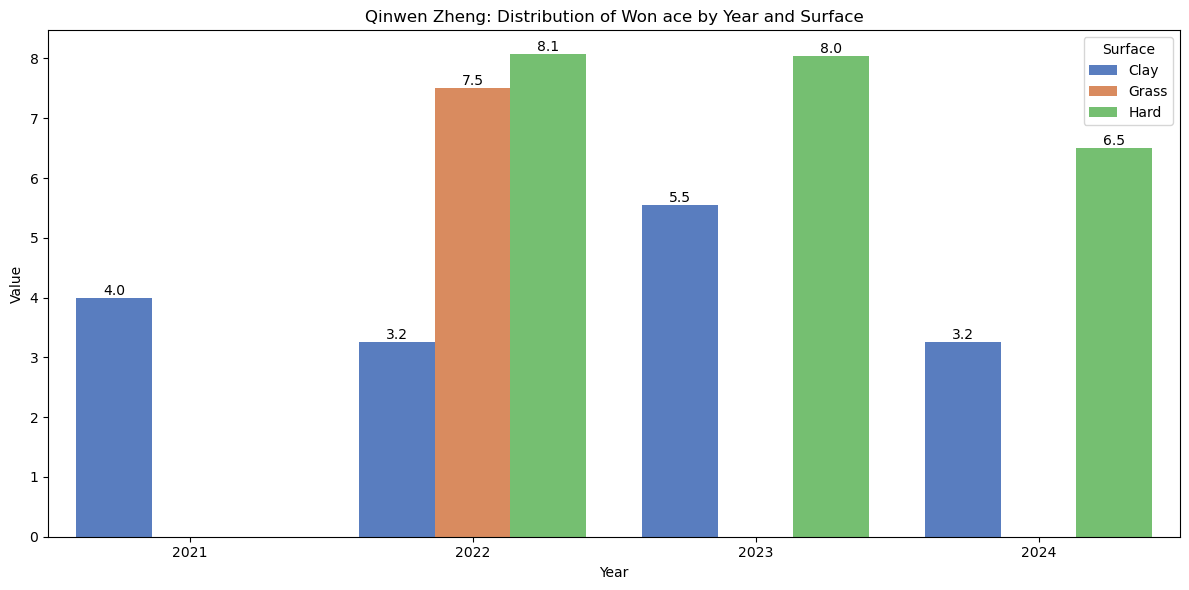

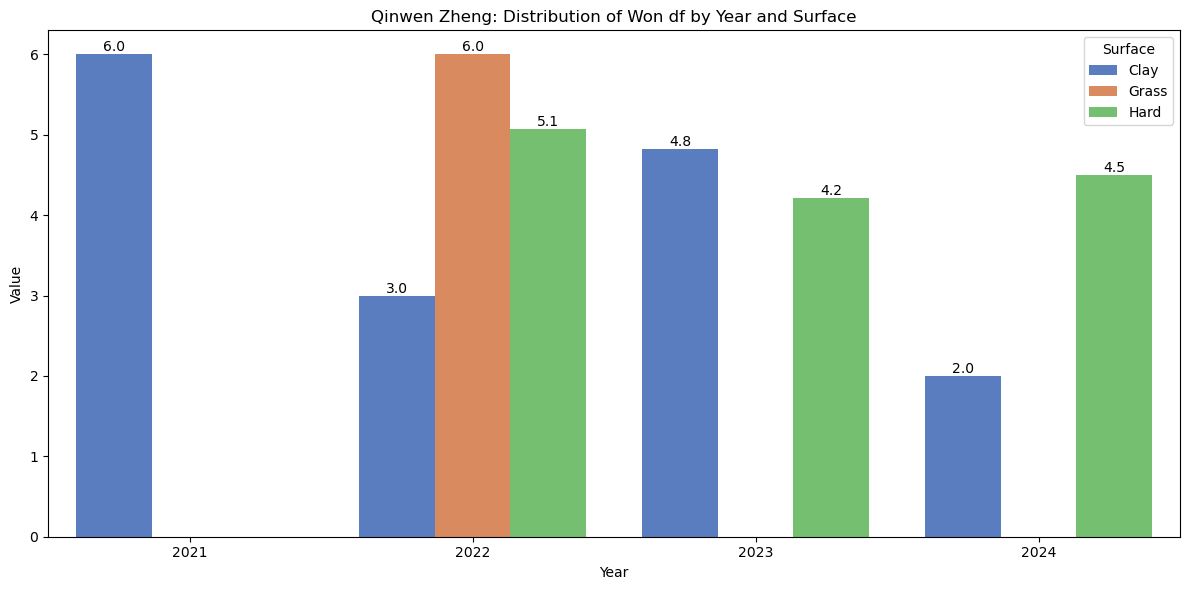

In [145]:
# Melting the DataFrame for easier plotting
QZw_melted = QZw_summary.melt(id_vars=['Year', 'surface'], value_vars=['1stIn', '1stWon', '2ndWon', 'ace', 'df'],
                    var_name='Metric', value_name='Value')

for metric in metrics:
    plt.figure(figsize=(12, 6))
    ax = sns.barplot(data=QZw_melted[QZw_melted['Metric'] == metric], x='Year', y='Value', hue='surface', errorbar=None, palette='muted')
    ax.set_title(f'Qinwen Zheng: Distribution of Won {metric} by Year and Surface')
    ax.set_xlabel('Year')
    ax.set_ylabel('Value')
    ax.legend(title='Surface')
    
    # Adding data labels
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.1f}', 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='bottom')

    plt.tight_layout()
    plt.show()

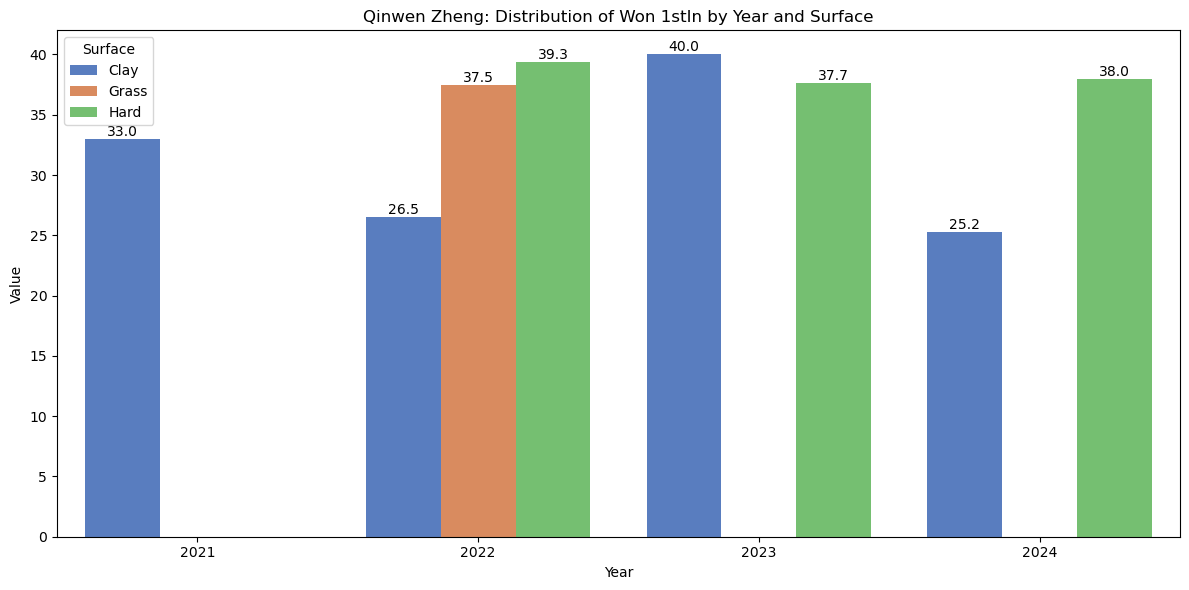

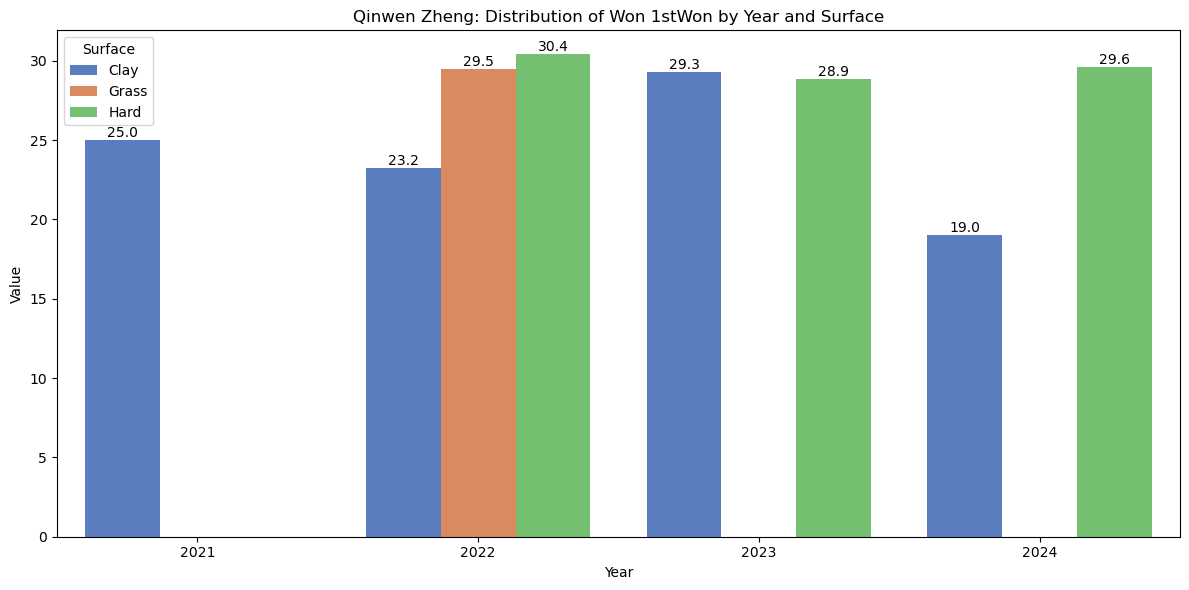

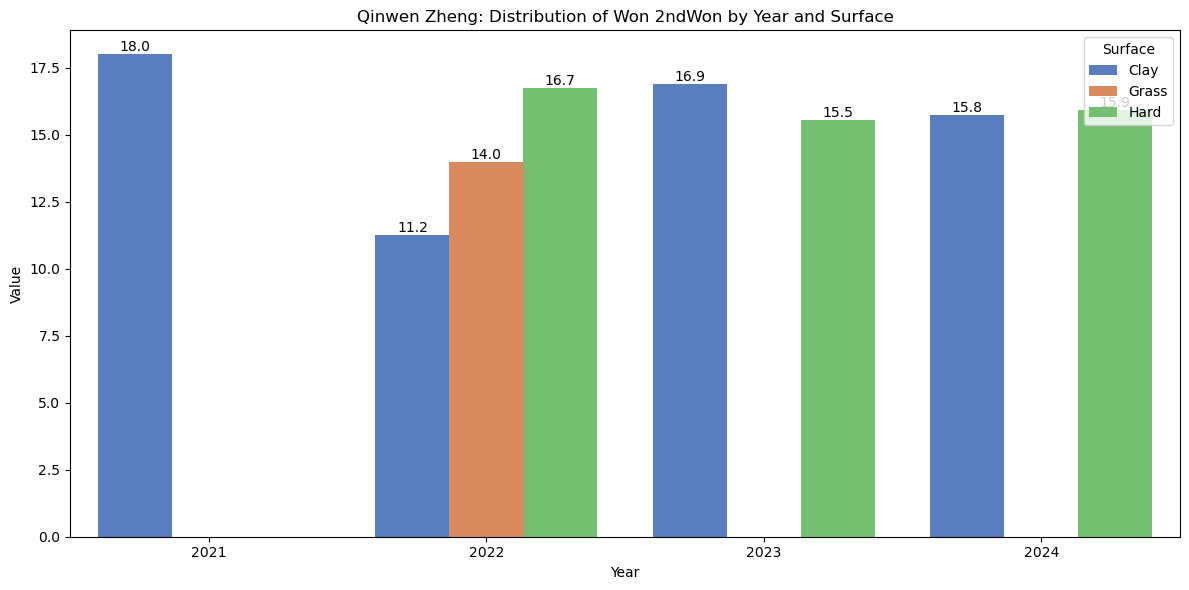

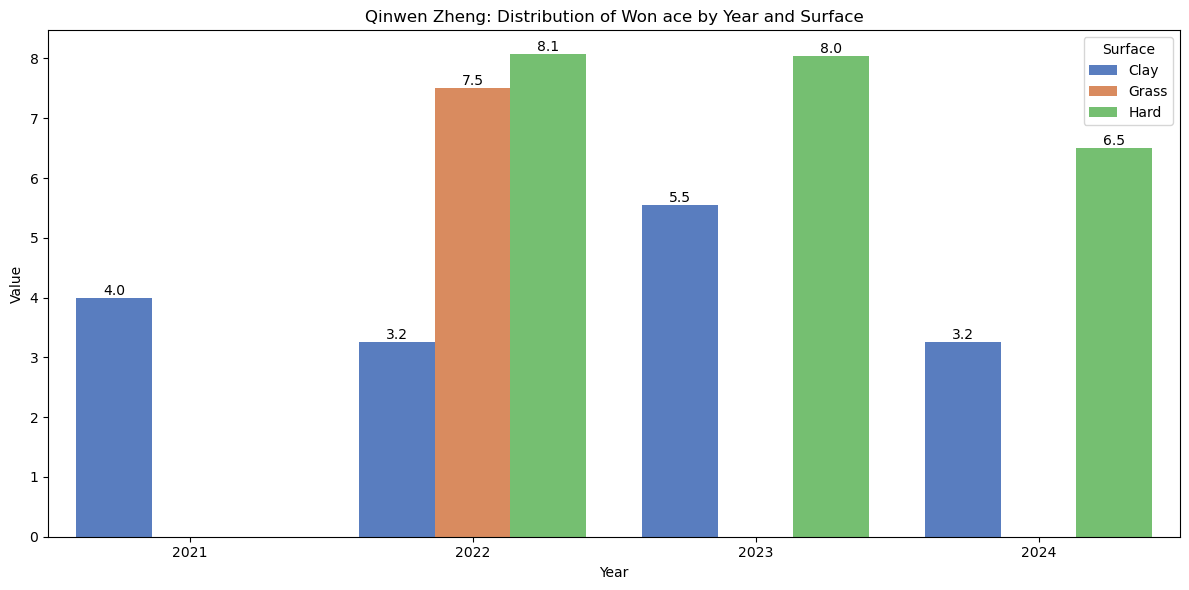

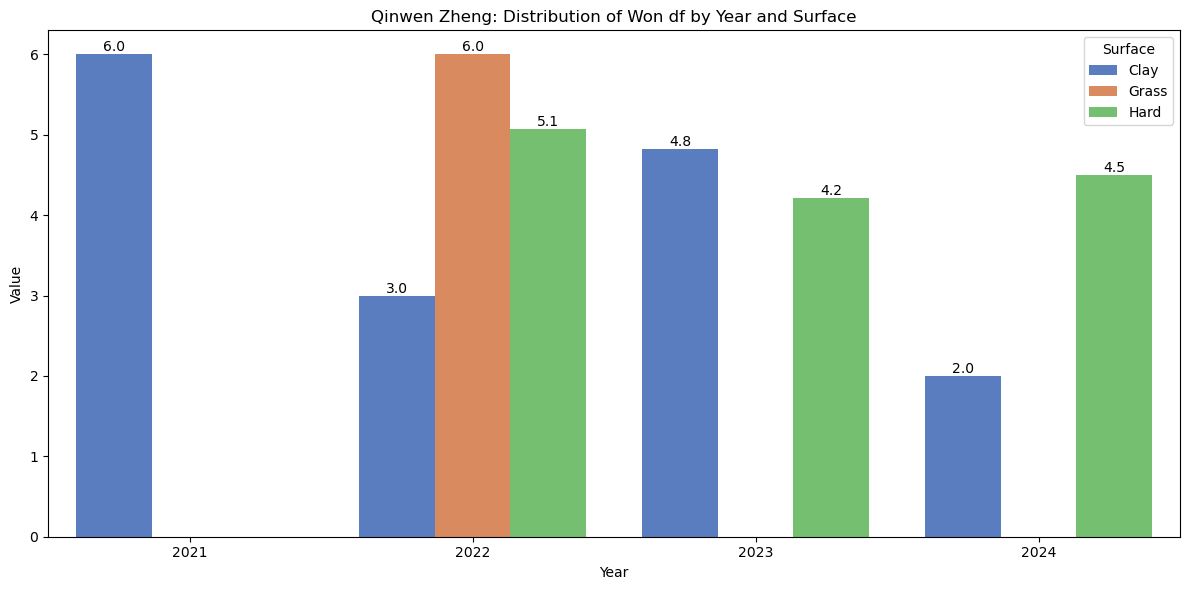

In [146]:
# Melting the DataFrame for easier plotting
QZl_melted = QZl_summary.melt(id_vars=['Year', 'surface'], value_vars=['1stIn', '1stWon', '2ndWon', 'ace', 'df'],
                    var_name='Metric', value_name='Value')

for metric in metrics:
    plt.figure(figsize=(12, 6))
    ax = sns.barplot(data=QZw_melted[QZw_melted['Metric'] == metric], x='Year', y='Value', hue='surface', errorbar=None, palette='muted')
    ax.set_title(f'Qinwen Zheng: Distribution of Won {metric} by Year and Surface')
    ax.set_xlabel('Year')
    ax.set_ylabel('Value')
    ax.legend(title='Surface')
    
    # Adding data labels
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.1f}', 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='bottom')

    plt.tight_layout()
    plt.show()

## Against Tournament by Overall Win %

In [148]:
# Group by Year and Surface, and calculate average win percentage

Cgtourney_performance = Cgyears.groupby(['Year', 'tourney_name']).agg({'Win_Percentage': 'mean'}).reset_index()

Cgtourney_performance['Type'] = np.where(
    Cgtourney_performance['tourney_name'].isin(['US Open', 'Australian Open', 'Wimbledon']),
    'Grand Slam',
    'Regular'
)

Astourney_performance = Asyears.groupby(['Year', 'tourney_name']).agg({'Win_Percentage': 'mean'}).reset_index()

Astourney_performance['Type'] = np.where(
    Astourney_performance['tourney_name'].isin(['US Open', 'Australian Open', 'Wimbledon']),
    'Grand Slam',
    'Regular'
)

Qztourney_performance = qzyears.groupby(['Year', 'tourney_name']).agg({'Win_Percentage': 'mean'}).reset_index()

Qztourney_performance['Type'] = np.where(
    Qztourney_performance['tourney_name'].isin(['US Open', 'Australian Open', 'Wimbledon']),
    'Grand Slam',
    'Regular'
)

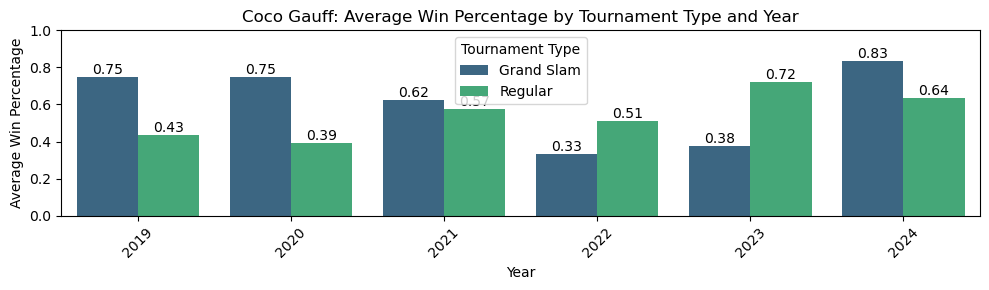

In [159]:
# Calculate average Win_Percentage by Year and Type
Cgaverage_win_percentage = Cgtourney_performance.groupby(['Year', 'Type'])['Win_Percentage'].mean().reset_index()

# Plotting
plt.figure(figsize=(10, 3))
sns.barplot(data=Cgaverage_win_percentage, x='Year', y='Win_Percentage', hue='Type', palette='viridis')

# Customize the plot
plt.title('Coco Gauff: Average Win Percentage by Tournament Type and Year')
plt.xlabel('Year')
plt.ylabel('Average Win Percentage')
plt.legend(title='Tournament Type')
plt.ylim(0, 1)  # Set y-axis limits from 0 to 1
plt.xticks(rotation=45)
plt.tight_layout()

# Adding data labels
for p in plt.gca().patches:
    plt.annotate(f'{p.get_height():.2f}', 
                 (p.get_x() + p.get_width() / 2., p.get_height()), 
                 ha='center', va='bottom')

plt.tight_layout()

# Show the plot
plt.show()

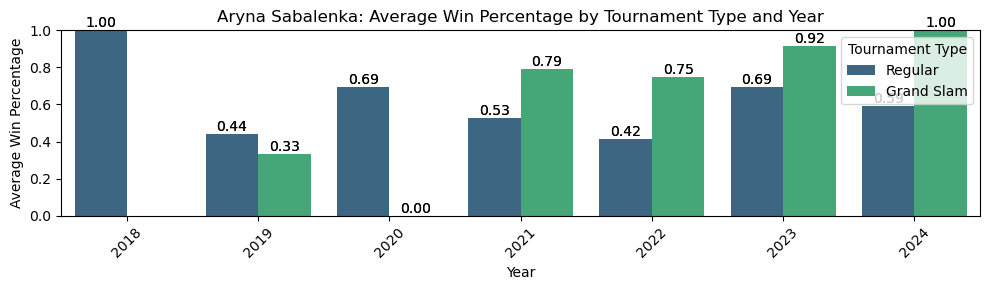

In [158]:
# Calculate average Win_Percentage by Year and Type
Asaverage_win_percentage = Astourney_performance.groupby(['Year', 'Type'])['Win_Percentage'].mean().reset_index()

# Plotting
plt.figure(figsize=(10, 3))
sns.barplot(data=Asaverage_win_percentage, x='Year', y='Win_Percentage', hue='Type', palette='viridis')

# Customize the plot
plt.title('Aryna Sabalenka: Average Win Percentage by Tournament Type and Year')
plt.xlabel('Year')
plt.ylabel('Average Win Percentage')
plt.legend(title='Tournament Type')
plt.ylim(0, 1)  # Set y-axis limits from 0 to 1
plt.xticks(rotation=45)
plt.tight_layout()

# Adding data labels
for p in plt.gca().patches:
    plt.annotate(f'{p.get_height():.2f}', 
                 (p.get_x() + p.get_width() / 2., p.get_height()), 
                 ha='center', va='bottom')

plt.tight_layout()

# Adding data labels
for p in plt.gca().patches:
    plt.annotate(f'{p.get_height():.2f}', 
                 (p.get_x() + p.get_width() / 2., p.get_height()), 
                 ha='center', va='bottom')

plt.tight_layout()

# Show the plot
plt.show()

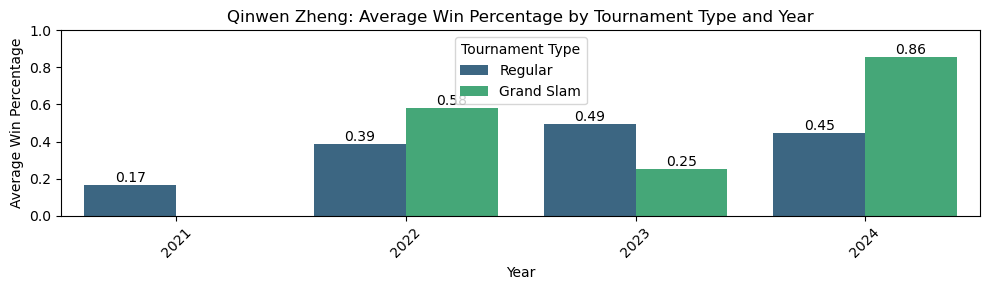

In [156]:
# Calculate average Win_Percentage by Year and Type
Qzaverage_win_percentage = Qztourney_performance.groupby(['Year', 'Type'])['Win_Percentage'].mean().reset_index()

# Plotting
plt.figure(figsize=(10, 3))
sns.barplot(data=Qzaverage_win_percentage, x='Year', y='Win_Percentage', hue='Type', palette='viridis')

# Customize the plot
plt.title('Qinwen Zheng: Average Win Percentage by Tournament Type and Year')
plt.xlabel('Year')
plt.ylabel('Average Win Percentage')
plt.legend(title='Tournament Type')
plt.ylim(0, 1)  # Set y-axis limits from 0 to 1
plt.xticks(rotation=45)
plt.tight_layout()

# Adding data labels
for p in plt.gca().patches:
    plt.annotate(f'{p.get_height():.2f}', 
                 (p.get_x() + p.get_width() / 2., p.get_height()), 
                 ha='center', va='bottom')

plt.tight_layout()

# Show the plot
plt.show()

## Against Tournamet by Serve %

In [153]:
# Group by Year and Surface, and calculate average win percentage

CGw_summary = CGw.groupby(['Year', 'tourney_name']).agg({'w_1stIn': 'mean', 'w_1stWon': 'mean', 'w_2ndWon': 'mean', 'w_ace': 'mean', 'w_df': 'mean'}).reset_index()

CGw_summary['Type'] = np.where(
    CGw_summary['tourney_name'].isin(['US Open', 'Australian Open', 'Wimbledon']),
    'Grand Slam',
    'Regular'
)

CGw_summary.rename({'w_1stIn': '1stIn', 'w_1stWon': '1stWon', 'w_2ndWon': '2ndWon', 'w_ace': 'ace', 'w_df': 'df'}, axis=1, inplace=True)
CGl_summary = CGl.groupby(['Year', 'tourney_name']).agg({'l_1stIn': 'mean', 'l_1stWon': 'mean', 'l_2ndWon': 'mean', 'l_ace': 'mean', 'l_df': 'mean'}).reset_index()

CGl_summary['Type'] = np.where(
    CGl_summary['tourney_name'].isin(['US Open', 'Australian Open', 'Wimbledon']),
    'Grand Slam',
    'Regular'
)

CGl_summary.rename({'l_1stIn': '1stIn', 'l_1stWon': '1stWon', 'l_2ndWon': '2ndWon', 'l_ace': 'ace', 'l_df': 'df'}, axis=1, inplace=True)


# Group by Year and Surface, and calculate average win percentage

ASw_summary = ASw.groupby(['Year', 'tourney_name']).agg({'w_1stIn': 'mean', 'w_1stWon': 'mean', 'w_2ndWon': 'mean', 'w_ace': 'mean', 'w_df': 'mean'}).reset_index()

ASw_summary['Type'] = np.where(
    ASw_summary['tourney_name'].isin(['US Open', 'Australian Open', 'Wimbledon']),
    'Grand Slam',
    'Regular'
)

ASw_summary.rename({'w_1stIn': '1stIn', 'w_1stWon': '1stWon', 'w_2ndWon': '2ndWon', 'w_ace': 'ace', 'w_df': 'df'}, axis=1, inplace=True)
ASl_summary = ASl.groupby(['Year', 'tourney_name']).agg({'l_1stIn': 'mean', 'l_1stWon': 'mean', 'l_2ndWon': 'mean', 'l_ace': 'mean', 'l_df': 'mean'}).reset_index()

ASl_summary['Type'] = np.where(
    ASl_summary['tourney_name'].isin(['US Open', 'Australian Open', 'Wimbledon']),
    'Grand Slam',
    'Regular'
)

ASl_summary.rename({'l_1stIn': '1stIn', 'l_1stWon': '1stWon', 'l_2ndWon': '2ndWon', 'l_ace': 'ace', 'l_df': 'df'}, axis=1, inplace=True)

# Group by Year and Surface, and calculate average win percentage

QZw_summary = QZw.groupby(['Year', 'tourney_name']).agg({'w_1stIn': 'mean', 'w_1stWon': 'mean', 'w_2ndWon': 'mean', 'w_ace': 'mean', 'w_df': 'mean'}).reset_index()

QZw_summary['Type'] = np.where(
    QZw_summary['tourney_name'].isin(['US Open', 'Australian Open', 'Wimbledon']),
    'Grand Slam',
    'Regular'
)

QZw_summary.rename({'w_1stIn': '1stIn', 'w_1stWon': '1stWon', 'w_2ndWon': '2ndWon', 'w_ace': 'ace', 'w_df': 'df'}, axis=1, inplace=True)
QZl_summary = QZl.groupby(['Year', 'tourney_name']).agg({'l_1stIn': 'mean', 'l_1stWon': 'mean', 'l_2ndWon': 'mean', 'l_ace': 'mean', 'l_df': 'mean'}).reset_index()

QZl_summary['Type'] = np.where(
    QZl_summary['tourney_name'].isin(['US Open', 'Australian Open', 'Wimbledon']),
    'Grand Slam',
    'Regular'
)

QZl_summary.rename({'l_1stIn': '1stIn', 'l_1stWon': '1stWon', 'l_2ndWon': '2ndWon', 'l_ace': 'ace', 'l_df': 'df'}, axis=1, inplace=True)

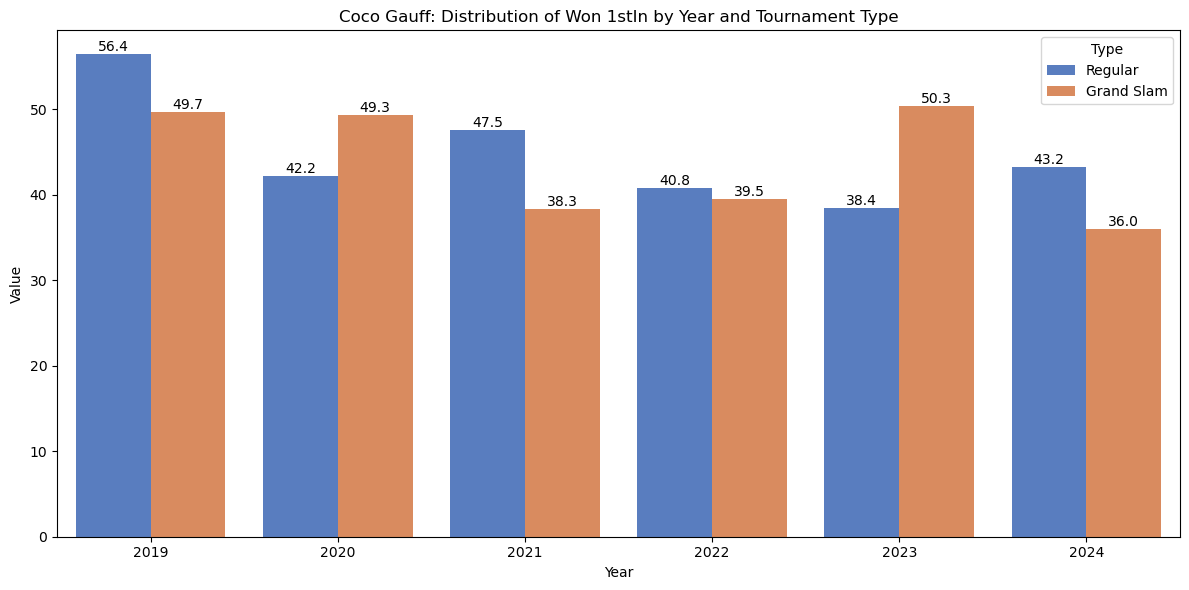

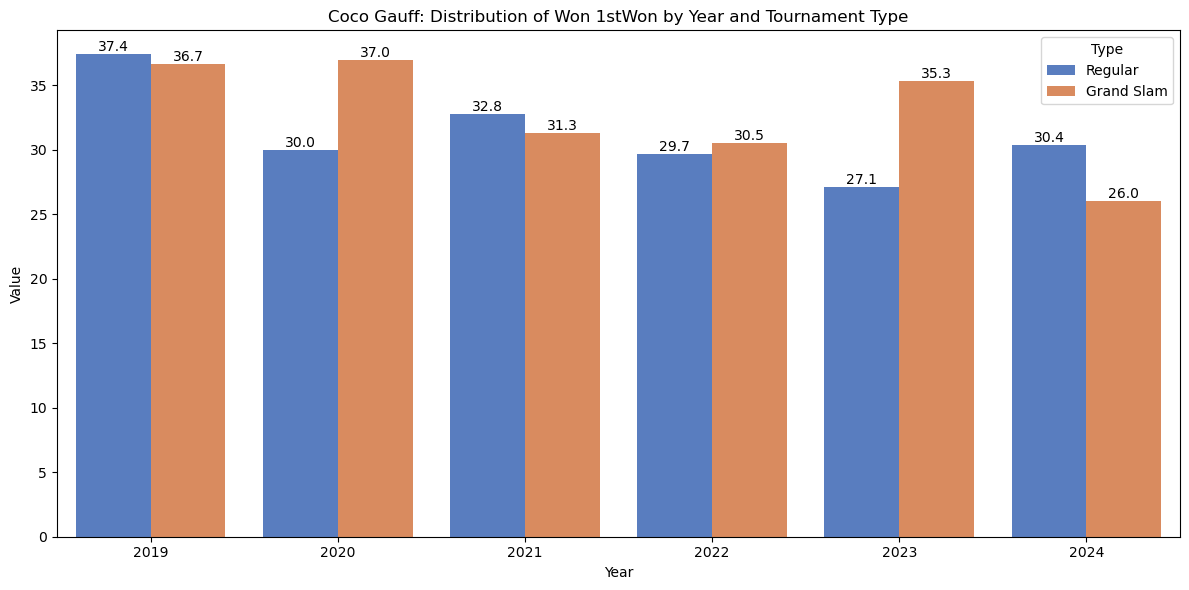

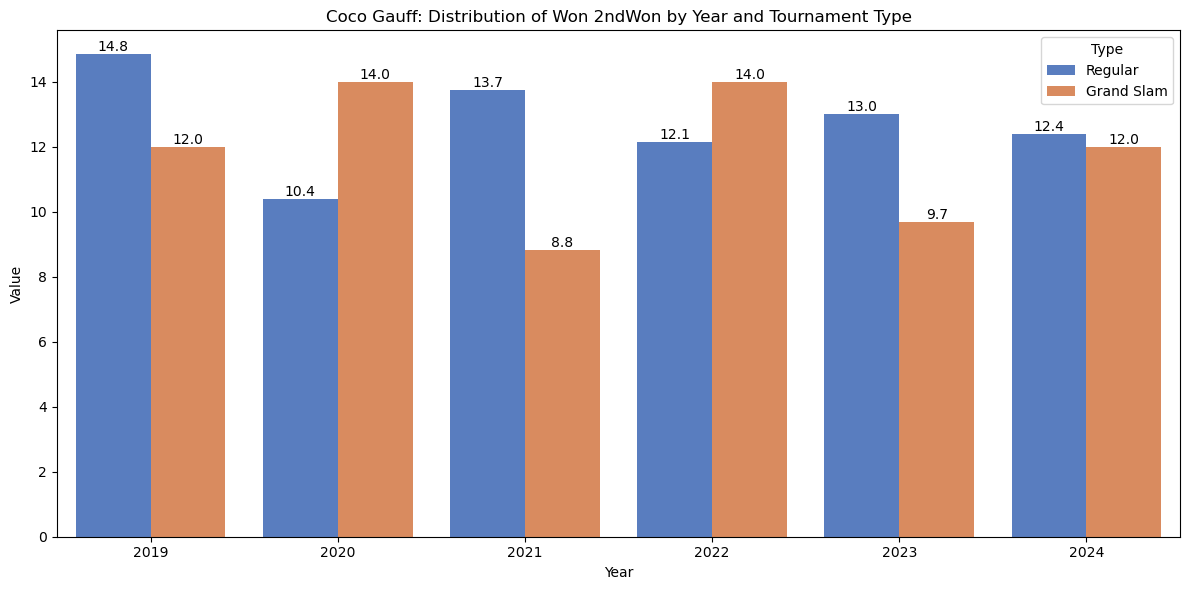

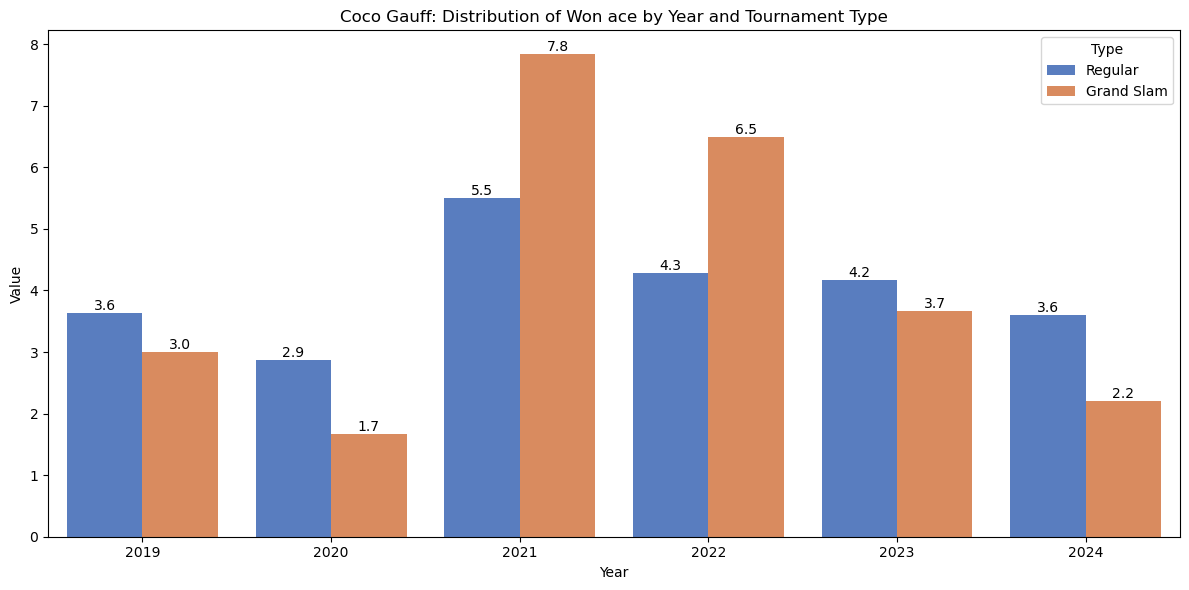

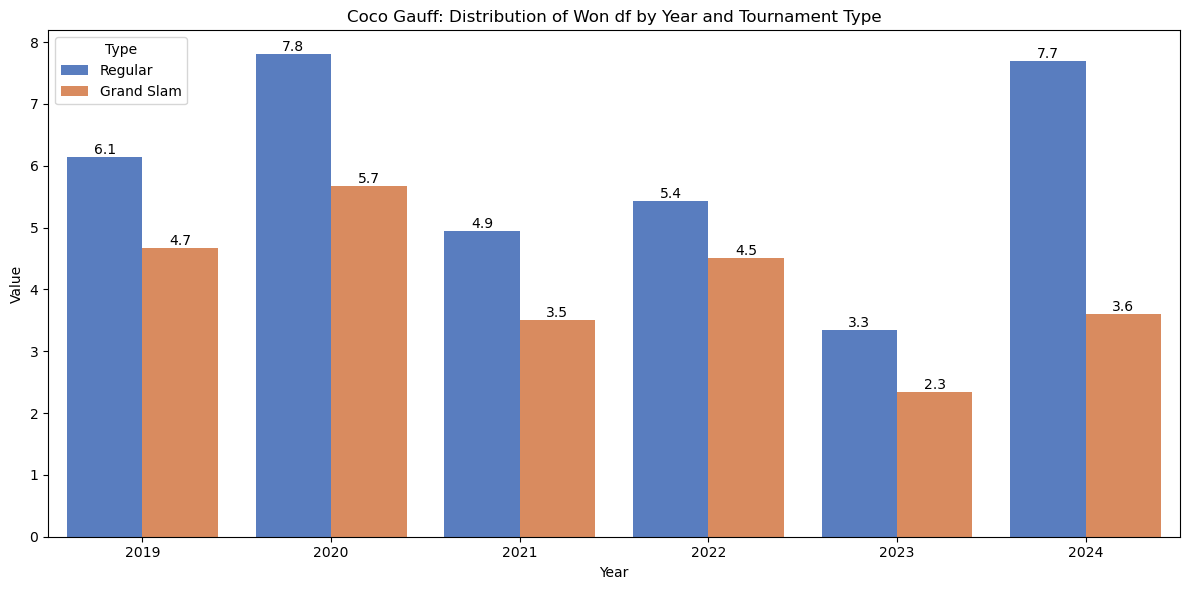

In [38]:
# Melting the DataFrame for easier plotting
CGw_melted = CGw_summary.melt(id_vars=['Year', 'Type'], value_vars=['1stIn', '1stWon', '2ndWon', 'ace', 'df'],
                    var_name='Metric', value_name='Value')

for metric in metrics:
    plt.figure(figsize=(12, 6))
    ax = sns.barplot(data=CGw_melted[CGw_melted['Metric'] == metric], x='Year', y='Value', hue='Type', errorbar=None, palette='muted')
    ax.set_title(f'Coco Gauff: Distribution of Won {metric} by Year and Tournament Type')
    ax.set_xlabel('Year')
    ax.set_ylabel('Value')
    ax.legend(title='Type')
    
    # Adding data labels
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.1f}', 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='bottom')

    plt.tight_layout()
    plt.show()

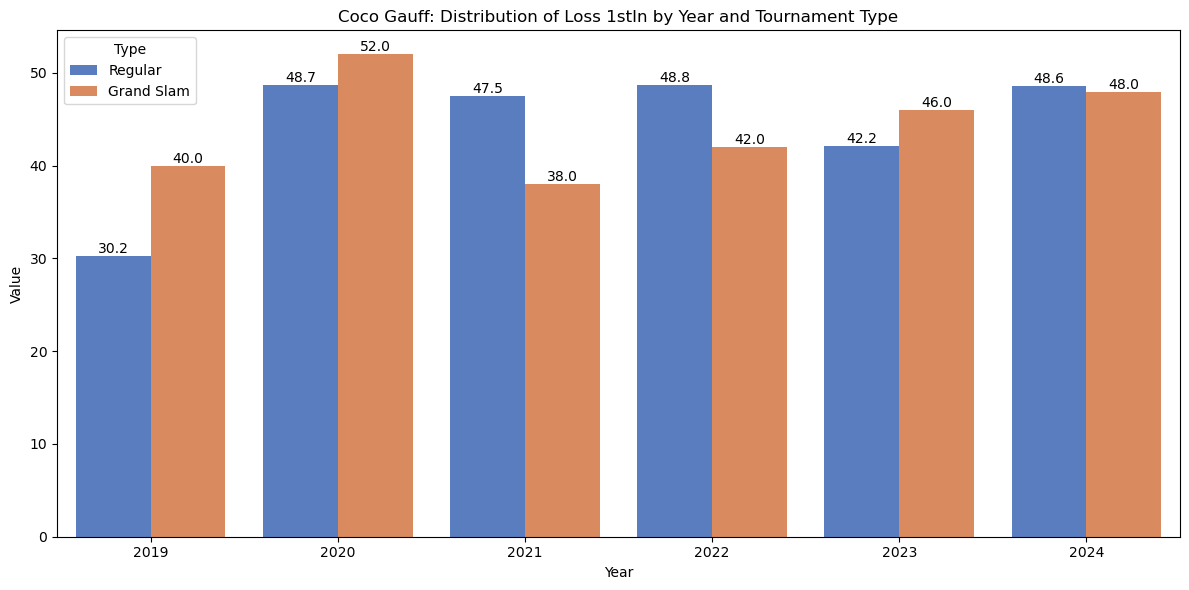

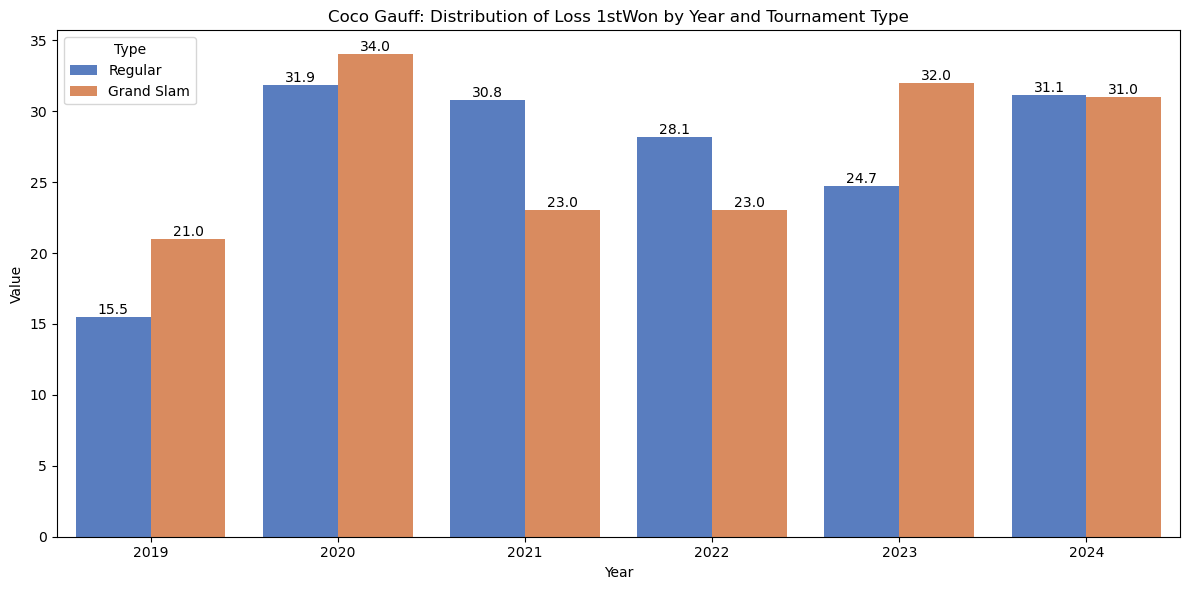

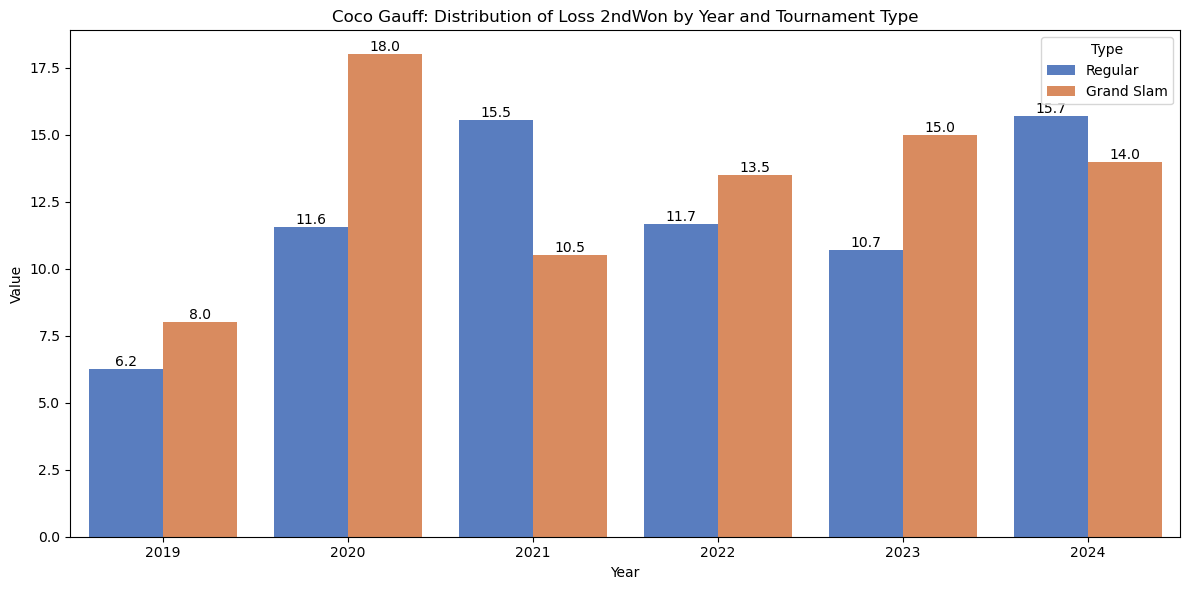

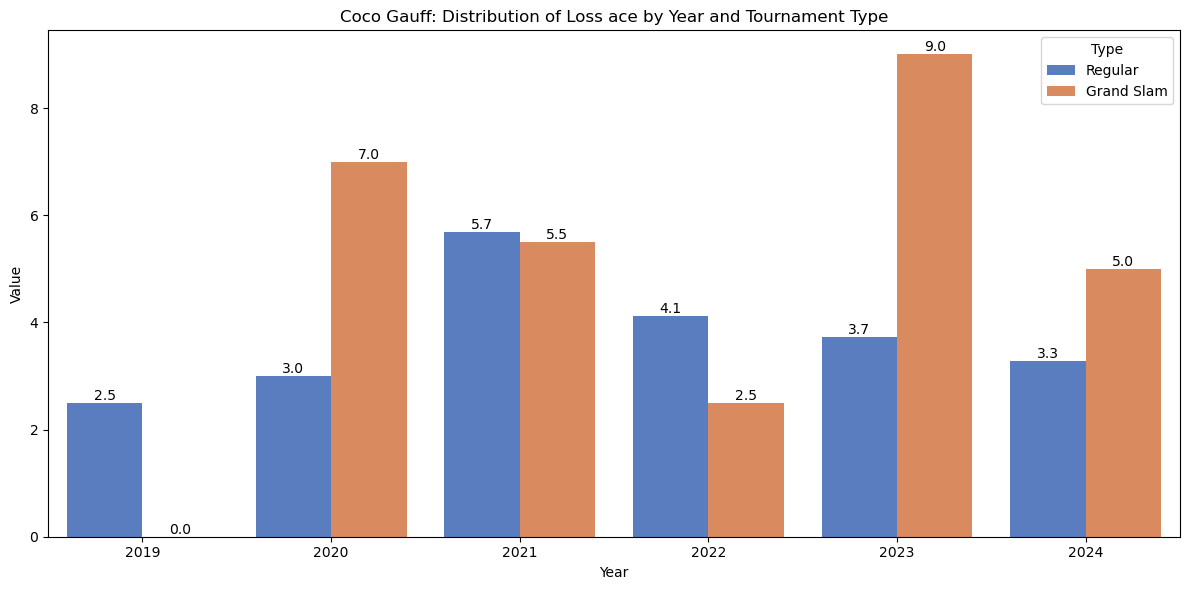

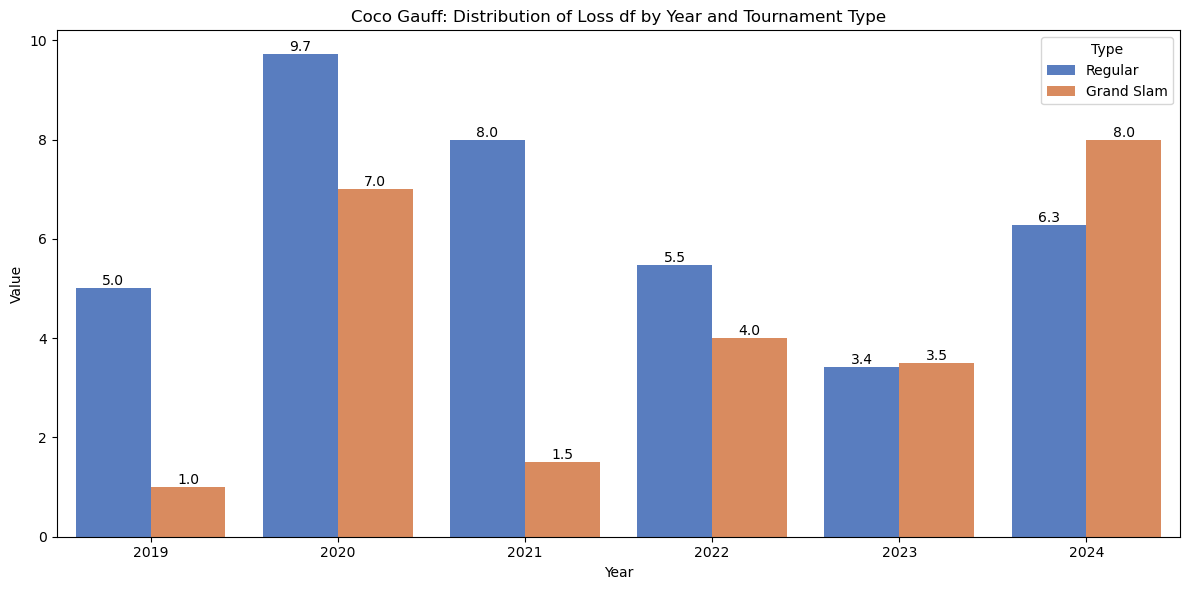

In [39]:
# Melting the DataFrame for easier plotting
CGl_melted = CGl_summary.melt(id_vars=['Year', 'Type'], value_vars=['1stIn', '1stWon', '2ndWon', 'ace', 'df'],
                    var_name='Metric', value_name='Value')

for metric in metrics:
    plt.figure(figsize=(12, 6))
    ax = sns.barplot(data=CGl_melted[CGl_melted['Metric'] == metric], x='Year', y='Value', hue='Type', errorbar=None, palette='muted')
    ax.set_title(f'Coco Gauff: Distribution of Loss {metric} by Year and Tournament Type')
    ax.set_xlabel('Year')
    ax.set_ylabel('Value')
    ax.legend(title='Type')
    
    # Adding data labels
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.1f}', 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='bottom')

    plt.tight_layout()
    plt.show()

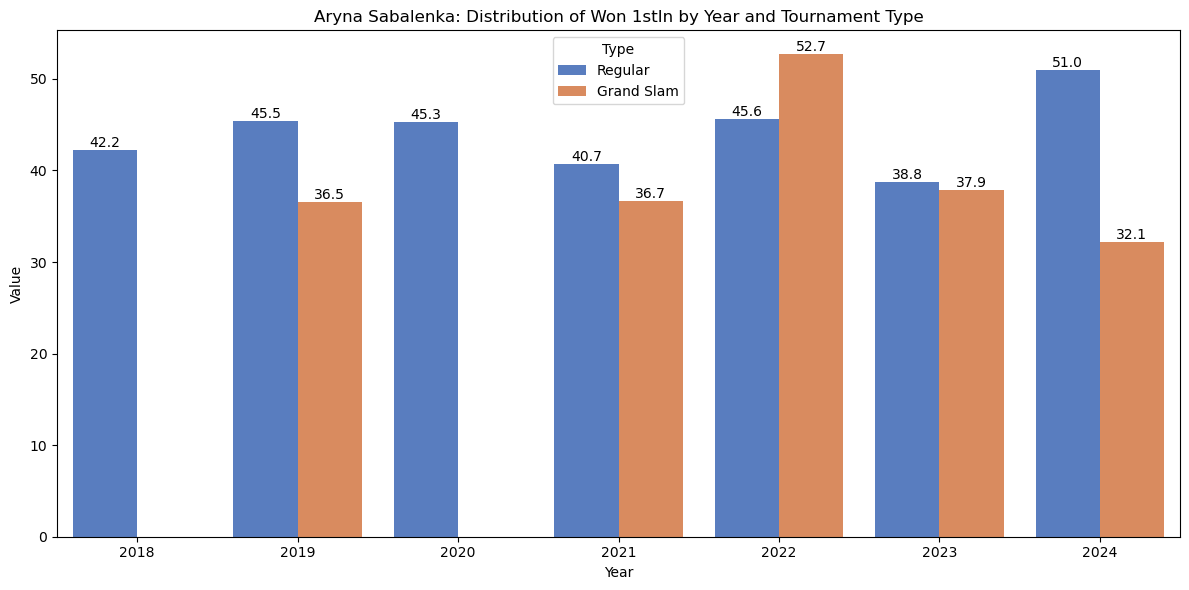

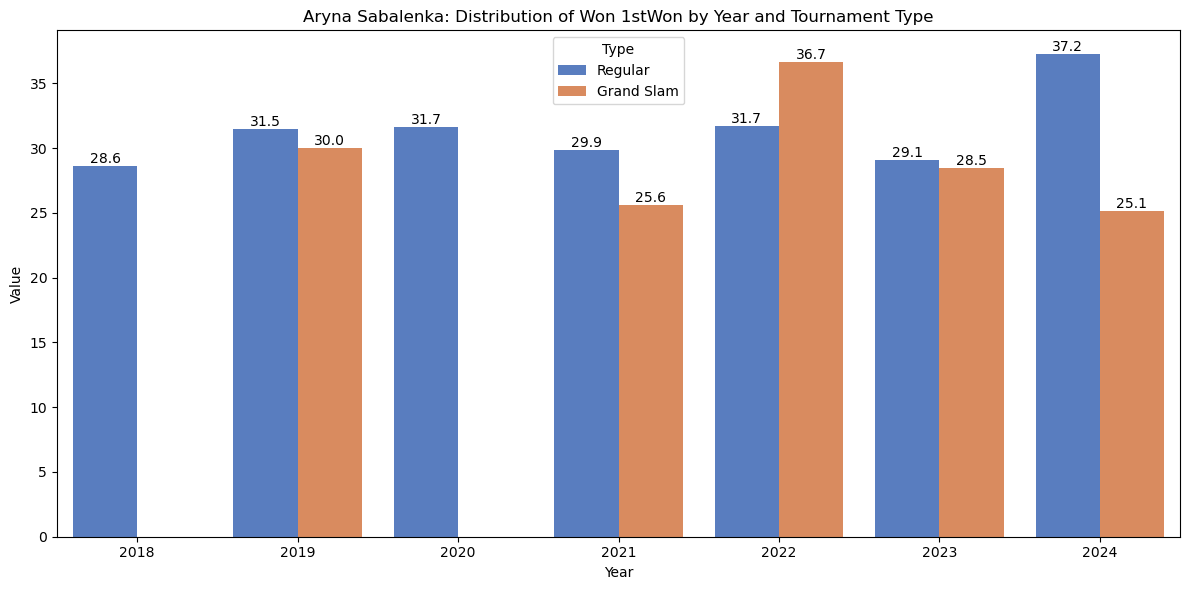

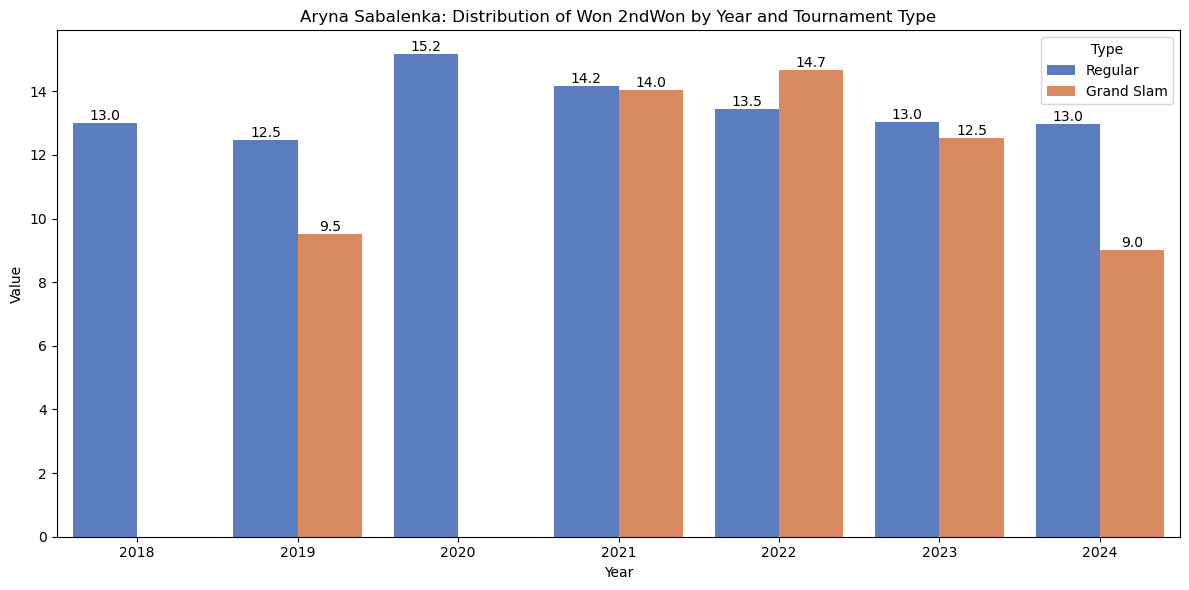

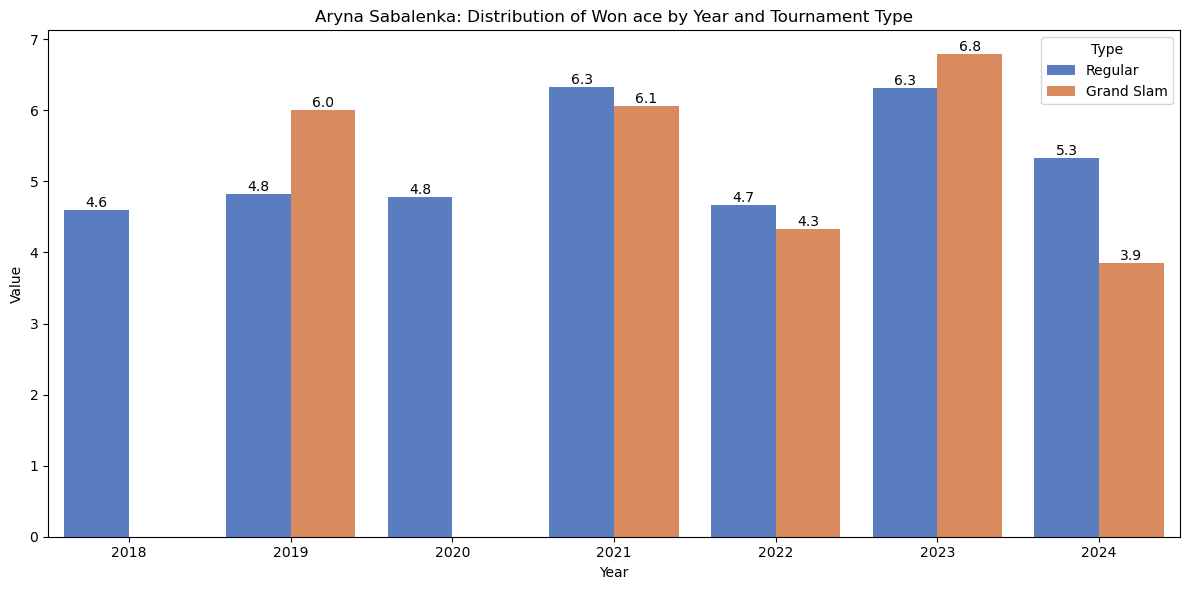

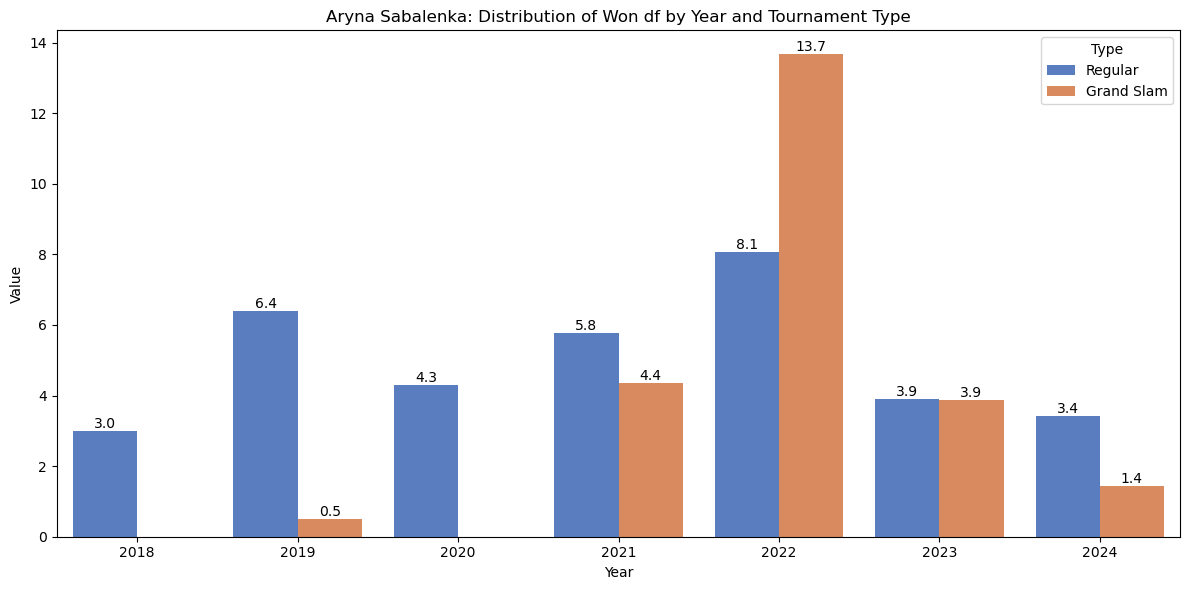

In [40]:
# Melting the DataFrame for easier plotting
ASw_melted = ASw_summary.melt(id_vars=['Year', 'Type'], value_vars=['1stIn', '1stWon', '2ndWon', 'ace', 'df'],
                    var_name='Metric', value_name='Value')

for metric in metrics:
    plt.figure(figsize=(12, 6))
    ax = sns.barplot(data=ASw_melted[ASw_melted['Metric'] == metric], x='Year', y='Value', hue='Type', errorbar=None, palette='muted')
    ax.set_title(f'Aryna Sabalenka: Distribution of Won {metric} by Year and Tournament Type')
    ax.set_xlabel('Year')
    ax.set_ylabel('Value')
    ax.legend(title='Type')
    
    # Adding data labels
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.1f}', 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='bottom')

    plt.tight_layout()
    plt.show()

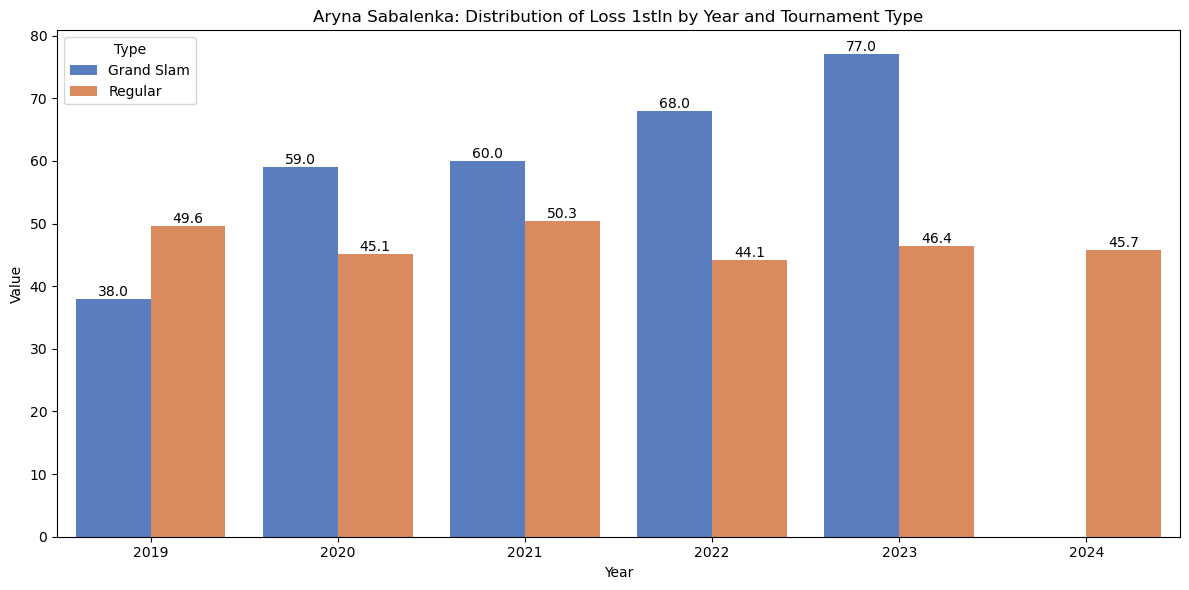

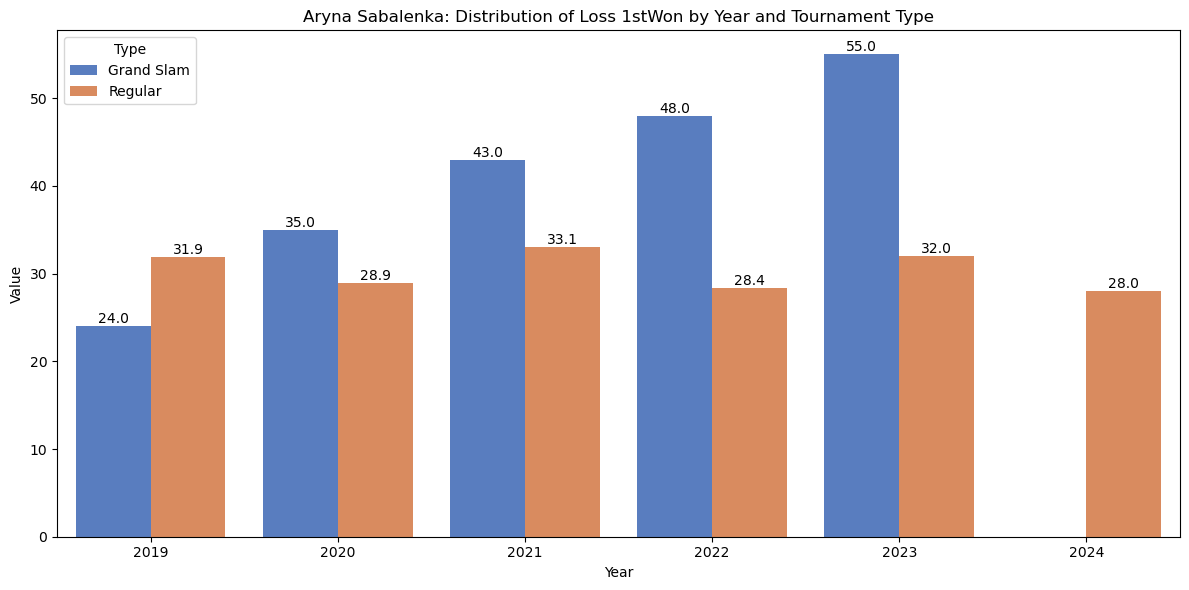

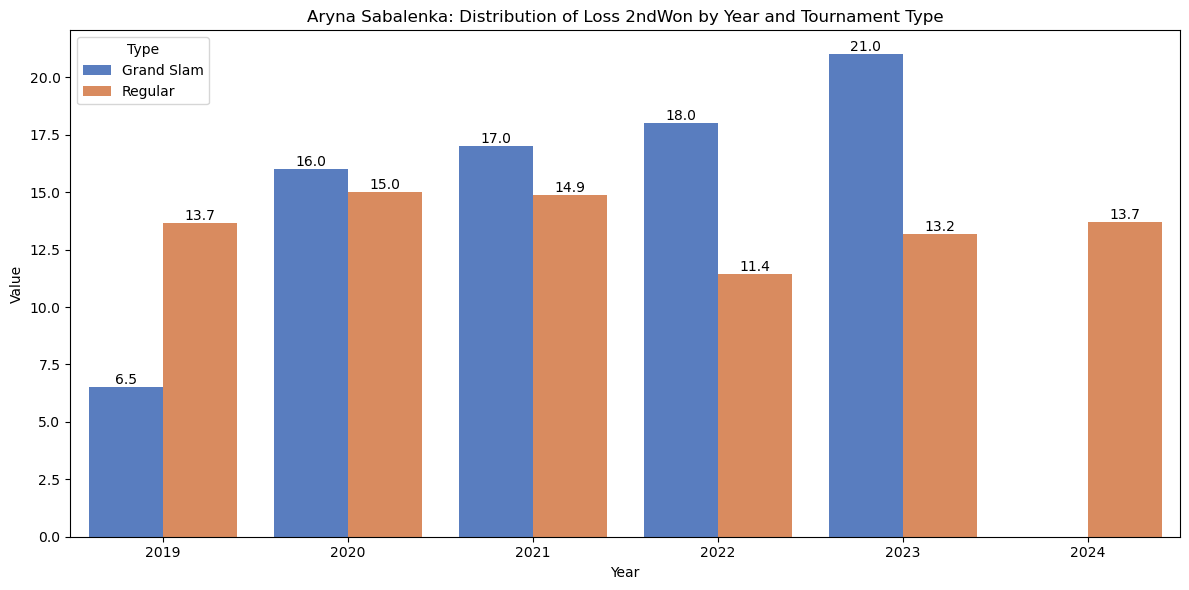

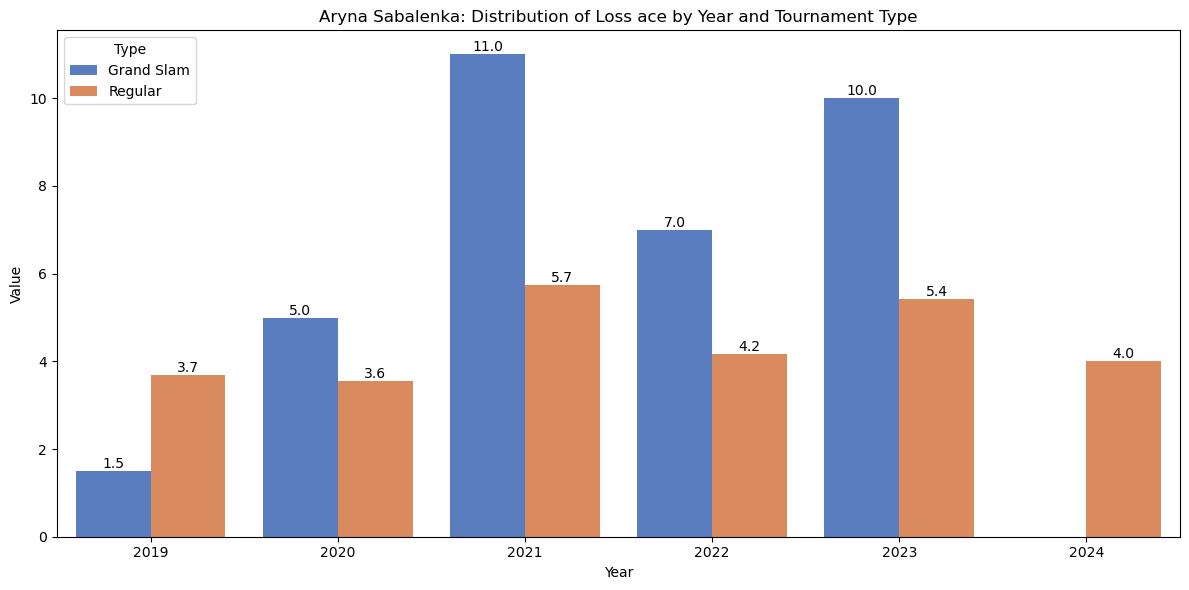

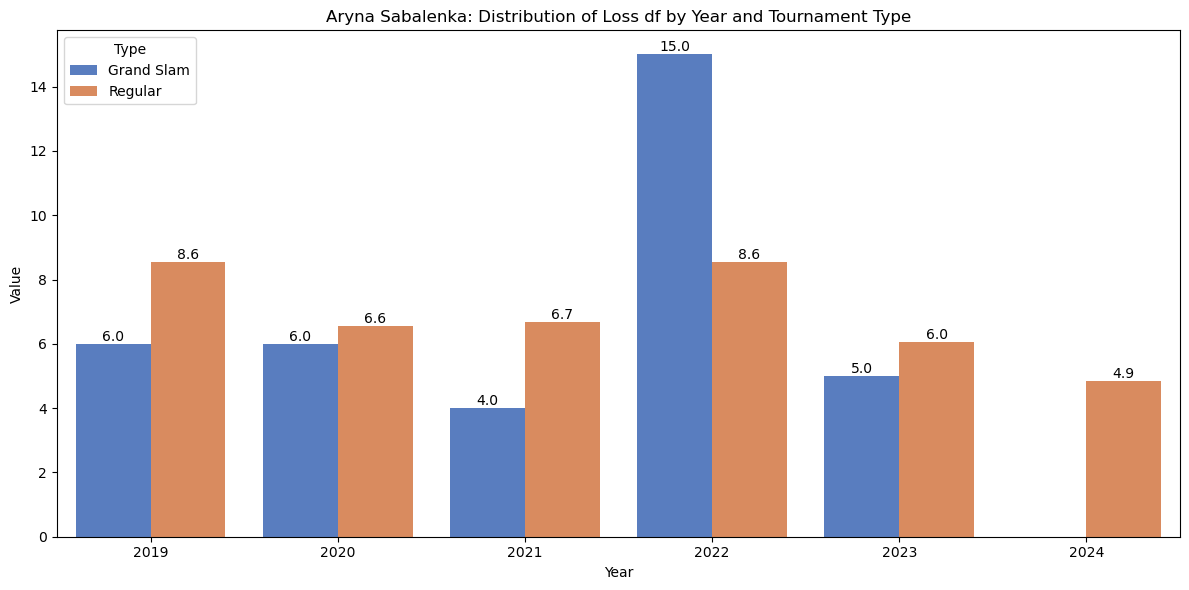

In [41]:
ASl_melted = ASl_summary.melt(id_vars=['Year', 'Type'], value_vars=['1stIn', '1stWon', '2ndWon', 'ace', 'df'],
                    var_name='Metric', value_name='Value')

for metric in metrics:
    plt.figure(figsize=(12, 6))
    ax = sns.barplot(data=ASl_melted[ASl_melted['Metric'] == metric], x='Year', y='Value', hue='Type', errorbar=None, palette='muted')
    ax.set_title(f'Aryna Sabalenka: Distribution of Loss {metric} by Year and Tournament Type')
    ax.set_xlabel('Year')
    ax.set_ylabel('Value')
    ax.legend(title='Type')
    
    # Adding data labels
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.1f}', 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='bottom')

    plt.tight_layout()
    plt.show()

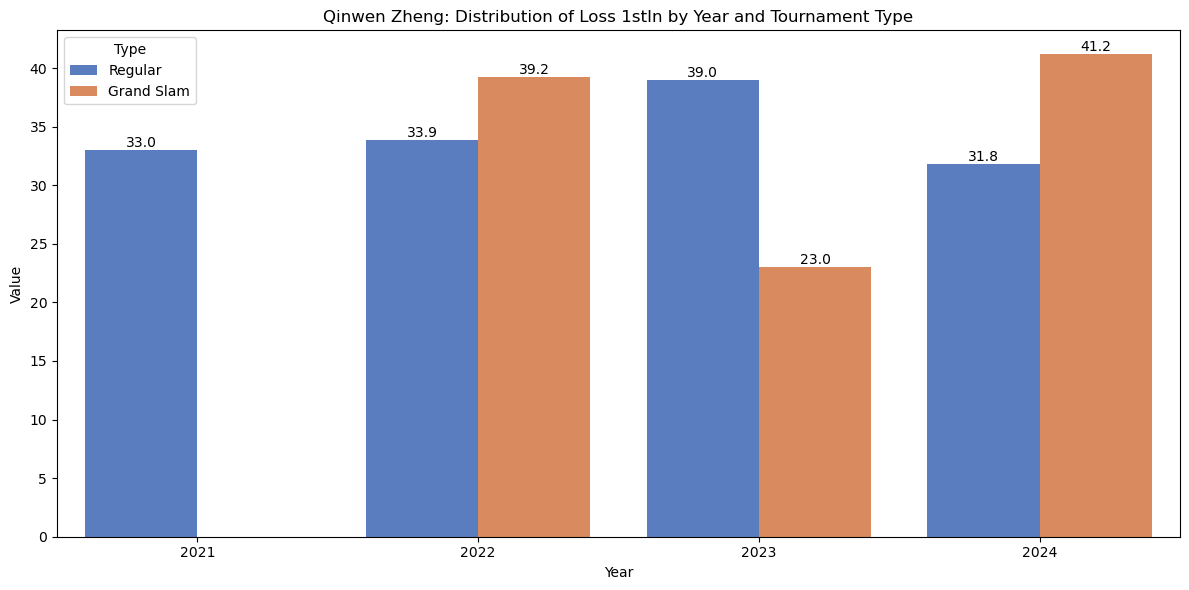

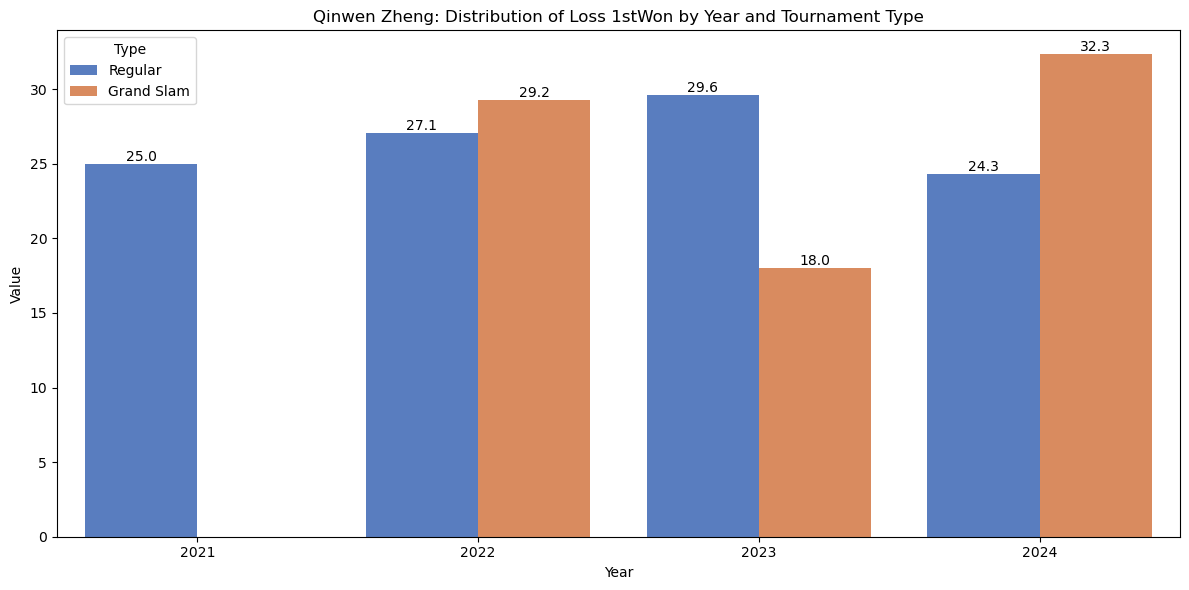

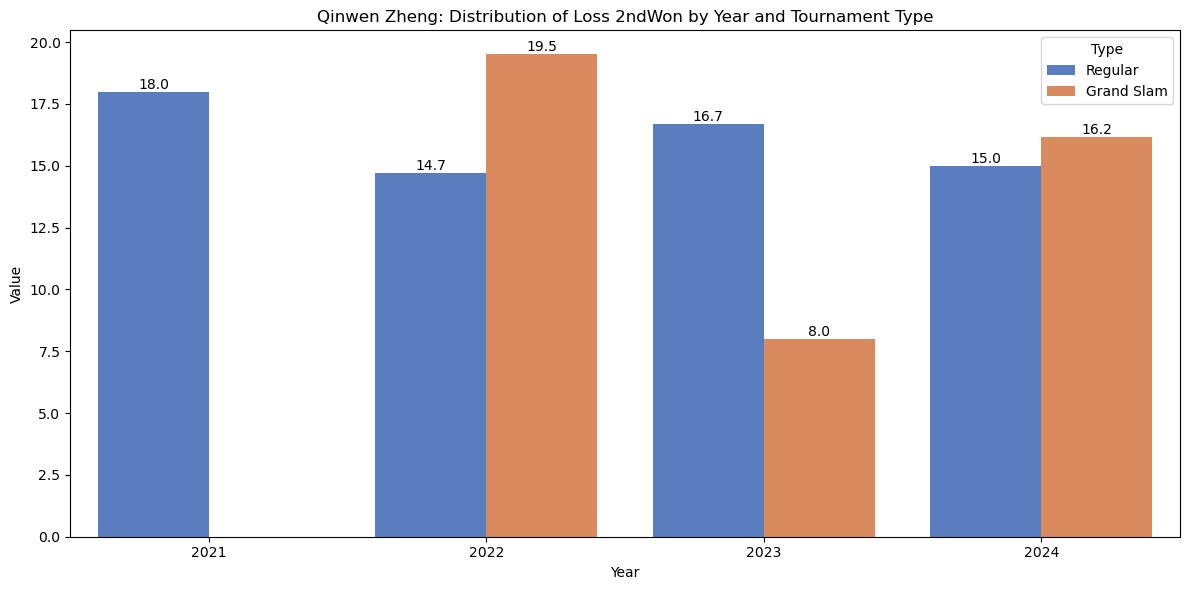

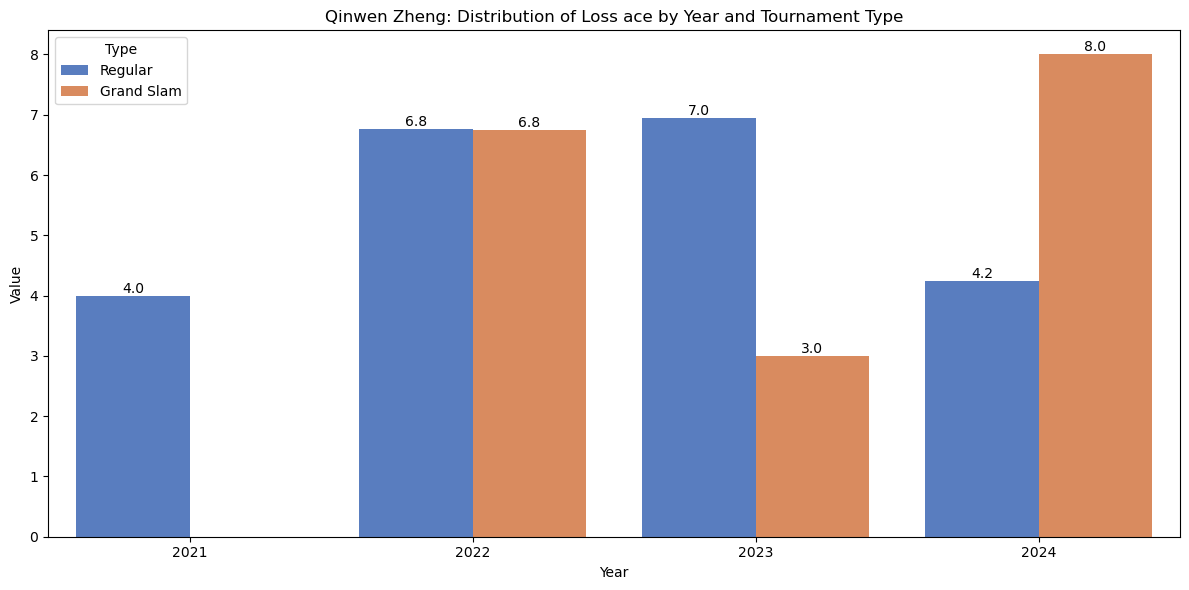

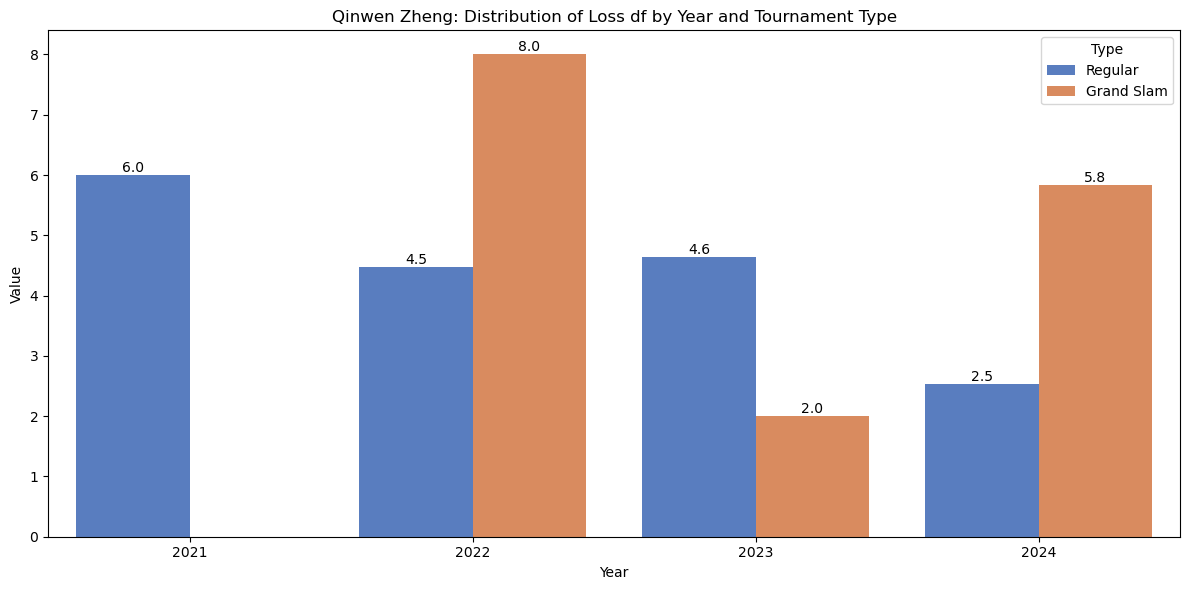

In [154]:
QZw_melted = QZw_summary.melt(id_vars=['Year', 'Type'], value_vars=['1stIn', '1stWon', '2ndWon', 'ace', 'df'],
                    var_name='Metric', value_name='Value')

for metric in metrics:
    plt.figure(figsize=(12, 6))
    ax = sns.barplot(data=QZw_melted[QZw_melted['Metric'] == metric], x='Year', y='Value', hue='Type', errorbar=None, palette='muted')
    ax.set_title(f'Qinwen Zheng: Distribution of Loss {metric} by Year and Tournament Type')
    ax.set_xlabel('Year')
    ax.set_ylabel('Value')
    ax.legend(title='Type')
    
    # Adding data labels
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.1f}', 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='bottom')

    plt.tight_layout()
    plt.show()

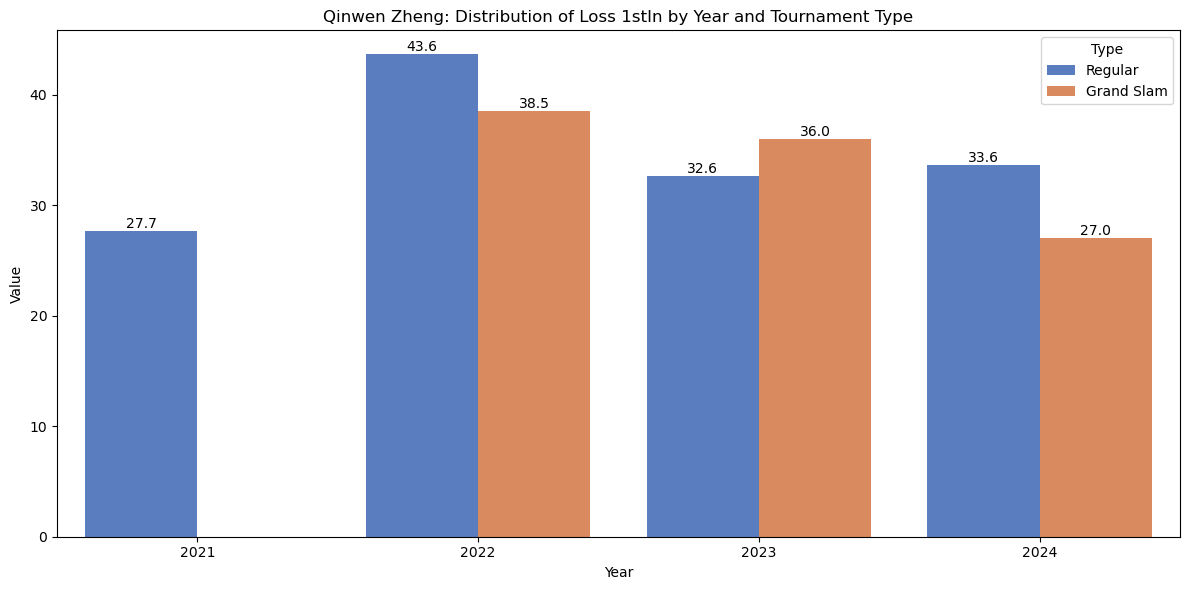

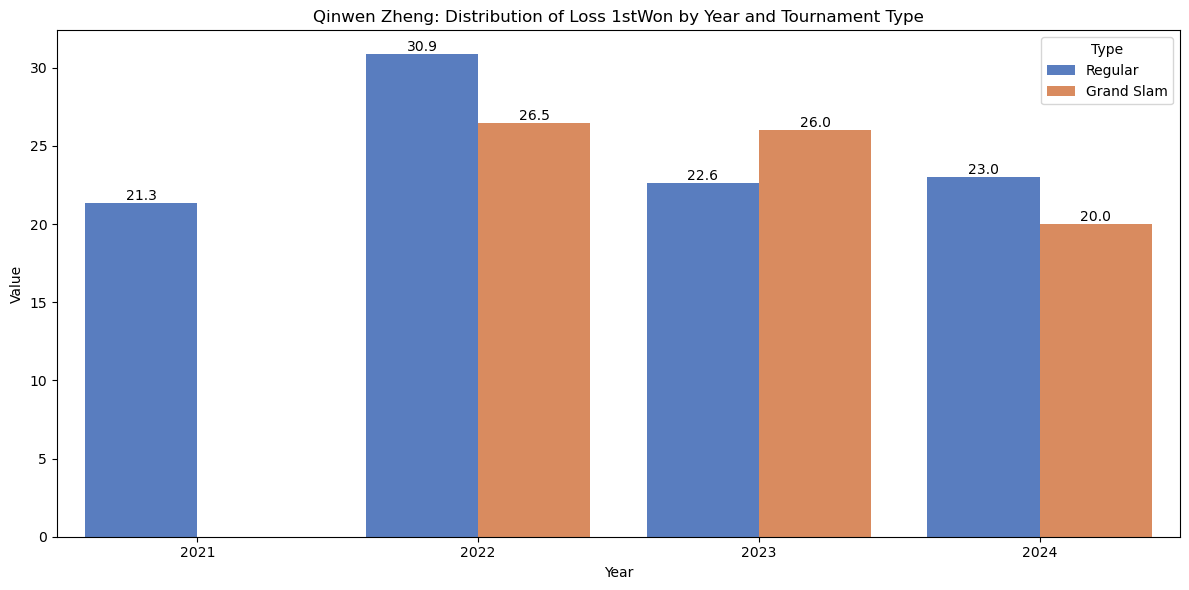

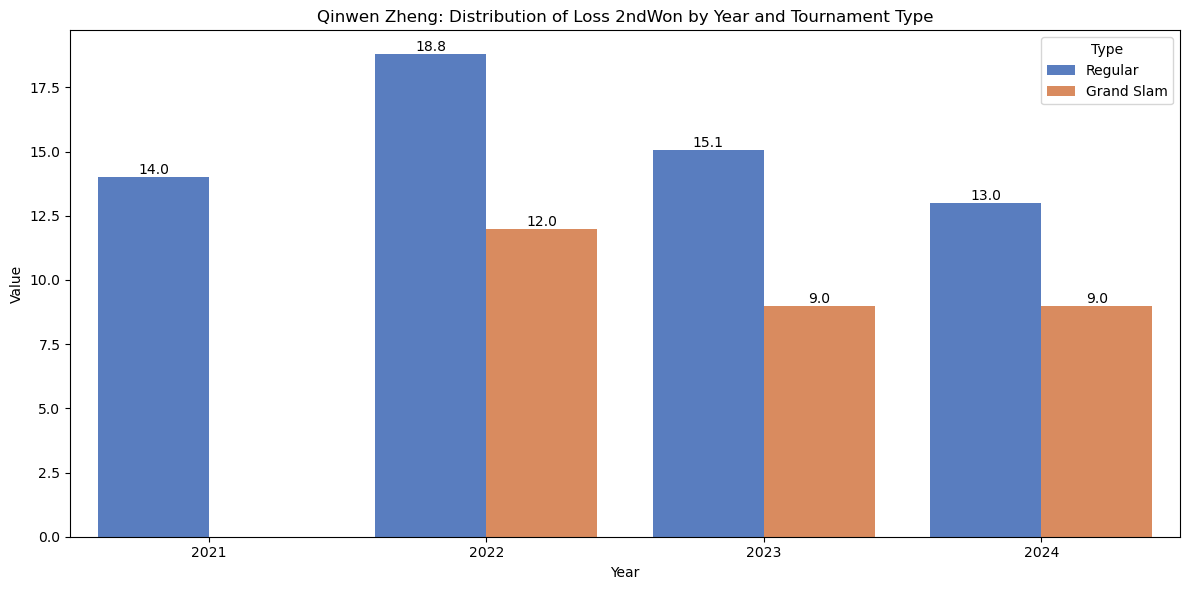

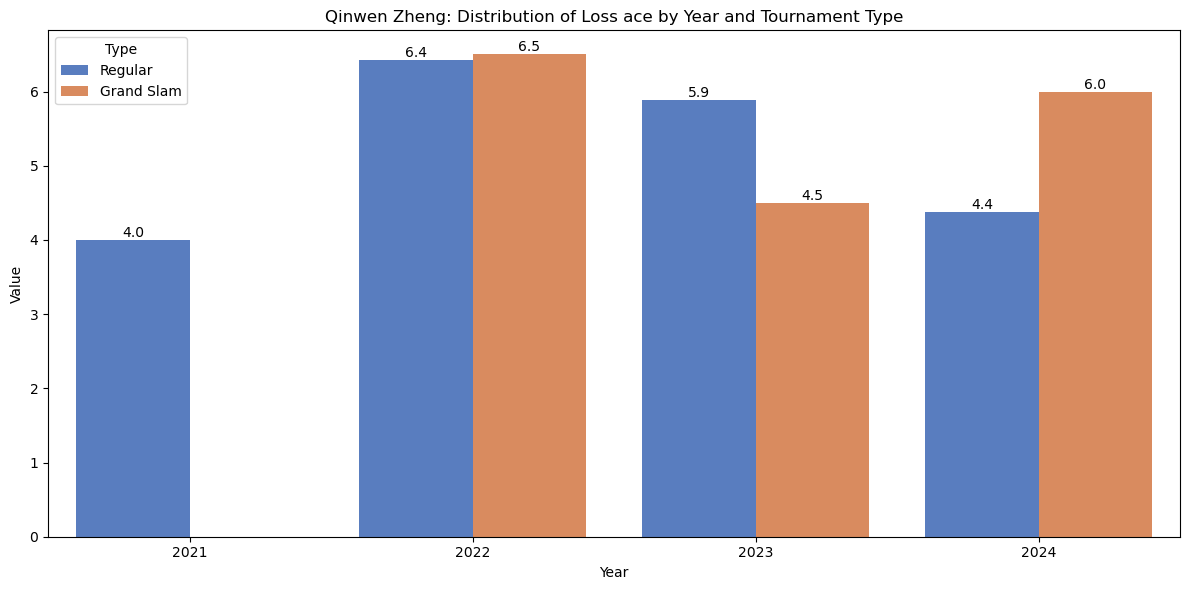

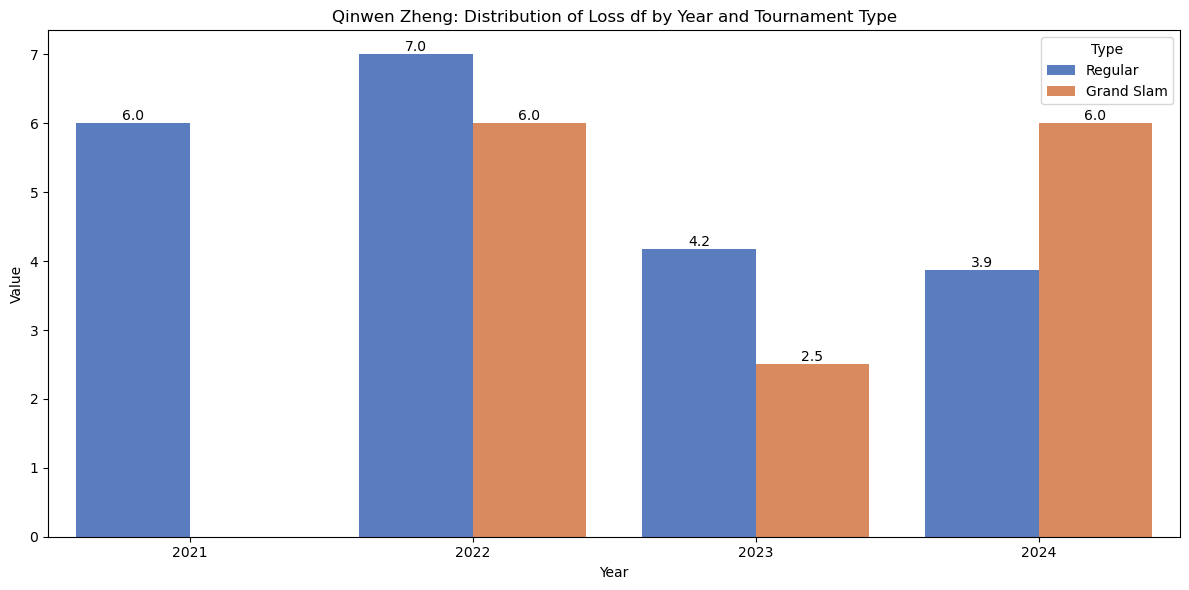

In [155]:
QZl_melted = QZl_summary.melt(id_vars=['Year', 'Type'], value_vars=['1stIn', '1stWon', '2ndWon', 'ace', 'df'],
                    var_name='Metric', value_name='Value')

for metric in metrics:
    plt.figure(figsize=(12, 6))
    ax = sns.barplot(data=QZl_melted[QZl_melted['Metric'] == metric], x='Year', y='Value', hue='Type', errorbar=None, palette='muted')
    ax.set_title(f'Qinwen Zheng: Distribution of Loss {metric} by Year and Tournament Type')
    ax.set_xlabel('Year')
    ax.set_ylabel('Value')
    ax.legend(title='Type')
    
    # Adding data labels
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.1f}', 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='bottom')

    plt.tight_layout()
    plt.show()